In [1]:
%run -i 'cosim_import.py'
import csv
import multiprocessing

0.post4515.dev0+gfb05885
2.9.0


In [2]:
caseH = 18
ict_off = False
ecc_off = False

%run -i 'cosim_setup_andes.py'

EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7726
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=-0.0
Ctrl: 0=7897; 1=6580; 
EVA: Load A from Aest.csv.
Working directory: "/home/jwang175/andes/jwang/notes"
> Loaded config from file "/home/jwang175/.andes/andes.rc"
> Loaded generated Python code in "/home/jwang175/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 6 processes.


Saved generated pycode to "/home/jwang175/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.2873 seconds.
Parsing input file "/home/jwang175/andes/jwang/case/ieee39_ev2.xlsx"...
Input file parsed in 0.1223 seconds.
System internal structure set up in 0.0519 seconds.


In [3]:
# import joblib
# from joblib import Parallel, delayed

# Nt = 5000
# def rne(time):
#     sse1 = ev_ssm(ts=time, N=Nt, step=1, tp=40,
#                   lr=0.1, lp=60, seed=2022, name="EVA",
#                   is_report=False)
#     [frcu, frcd] = sse1.g_frc()
#     return [sse1.ts, frcu, frcd, sse1.ne]

# # # interval by minutes, 24H
# answer = Parallel(n_jobs=joblib.cpu_count())(delayed(rne)(i) for i in np.arange(1/60, 2, 5/60))

In [4]:
# sse1 = ev_ssm(ts=10, N=Nt, step=1, tp=40,
#                 lr=0.1, lp=60, seed=2022, name="EVA",
#                 is_report=False)
# sse1.g_frc()

In [5]:
# plt.style.use('ieee')
# frc = pd.DataFrame(np.array(answer), columns=['time', 'frcu', 'frcd', 'ne'])
# frc.time *= 60
# # newdf = pd.DataFrame(np.repeat(frc.iloc[range(0,1440,5)].values, 5, axis=0), columns=frc.columns)
# # frcn = frc[['frcu', 'frcd']] - newdf[['frcu', 'frcd']]
# frc.plot(x='time', y=['frcu', 'frcd'])

In [6]:
sse.g_frc()

[122.63667729342288, 9.79602465724165]

In [7]:
sse0 = ev_ssm(ts=caseH, N=50000, step=1, tp=40,
             lr=0.1, lp=60, seed=2022, name="EVA",
             n_pref=1, is_report=True,
             tt_mean=0.5, tt_var=0.02, tt_lb=0, tt_ub=1,
             ict_off=ict_off, ecc_off=ecc_off)

EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7726
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=-0.0
Ctrl: 0=7897; 1=6580; 


In [8]:
%run -i 'cosim_setup_dispatch.py'

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.1595 seconds.
0: |F(x)| = 9.101680411
1: |F(x)| = 3.497456414
2: |F(x)| = 0.1830766454
3: |F(x)| = 0.0007183029104
4: |F(x)| = 1.659286886e-08
Converged in 5 iterations in 0.0098 seconds.
Power flow results are consistent. Conversion is successful.


Restricted license - for non-production use only - expires 2023-10-25


-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.0162 seconds.
0: |F(x)| = 9.101680411
1: |F(x)| = 3.497456414
2: |F(x)| = 0.1830766454
3: |F(x)| = 0.0007183029104
4: |F(x)| = 1.659286886e-08
Converged in 5 iterations in 0.0148 seconds.
Power flow results are consistent. Conversion is successful.
GSF is consistent.
RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=4889.131


pp cost=2184.5741560778915, gb cost=4889.131241556355


In [9]:
%run -i 'cosim_linktable.py'

# Change ``rru``, ``rrd``, ``rsfr``, ``t_total`` for necessary.
t_total = 3600

rru, rrd, rsfr = 1.0, 1.0, 0.04

# Define functions and constants used in loop
%run -i 'cosim_const.py'

In [10]:
# SFR, with ict control
socf1 = pd.read_csv('cosim_18_F_ict_evsoc1.csv')
socf2 = pd.read_csv('cosim_18_F_ict_evsoc2.csv')
socfm = pd.concat([socf1, socf2], axis=0).reset_index(drop=True)

# SFR, without ict control
socfn1 = pd.read_csv('cosim_18_F_evsoc1.csv')
socfn2 = pd.read_csv('cosim_18_F_evsoc2.csv')
socfnm = pd.concat([socfn1, socfn2], axis=0).reset_index(drop=True)

# no SFR
socs1 = pd.read_csv('cosim_18_S_evsoc1.csv')
socs2 = pd.read_csv('cosim_18_S_evsoc2.csv')
socsm = pd.concat([socs1, socs2], axis=0).reset_index(drop=True)

pgf = pd.read_csv('cosim_18_F_ict_pg.csv')
pgs = pd.read_csv('cosim_18_S_pg.csv')
pgfn = pd.read_csv('cosim_18_F_pg.csv')
agcf = pd.read_csv('cosim_18_F_ict_agcm.csv')
agcs = pd.read_csv('cosim_18_S_agcm.csv')
agcfn = pd.read_csv('cosim_18_F_agcm.csv')
outf = pd.read_csv('cosim_18_F_ict_out.csv')
outs = pd.read_csv('cosim_18_S_out.csv')
outfn = pd.read_csv('cosim_18_F_out.csv')
outf['fd'] = outf['freq'] - ssa.config.freq
outs['fd'] = outs['freq'] - ssa.config.freq
outfn['fd'] = outfn['freq'] - ssa.config.freq

evf = pd.read_csv('cosim_18_F_ict_sse.csv')
evs = pd.read_csv('cosim_18_S_sse.csv')
evfn = pd.read_csv('cosim_18_F_sse.csv')
evdf = pd.read_csv('cosim_18_F_ict_evdata.csv')
evds = pd.read_csv('cosim_18_S_evdata.csv')
evdfn = pd.read_csv('cosim_18_F_evdata.csv')

sfrf = pd.read_csv('cosim_18_F_ict_sfr.csv')
sfrs = pd.read_csv('cosim_18_S_sfr.csv')
sfrfn = pd.read_csv('cosim_18_F_sfr.csv')

evagcf = pd.read_csv('cosim_18_F_ict_evagc.csv').T
evsocf = socfm.T
evsocf.sort_values(by=['0'], axis=1, inplace=True)
evagcs = pd.read_csv('cosim_18_S_evagc.csv').T
evsocs = socsm.T
evsocs.sort_values(by=['0'], axis=1, inplace=True)
evagcfn = pd.read_csv('cosim_18_F_evagc.csv').T
evsocfn = socfnm.T
evsocfn.sort_values(by=['0'], axis=1, inplace=True)

reader = csv.reader(open('cosim_18_F_ict_rted.csv', 'r'))
rted_res = {}
for row in reader:
   k, v = row
   rted_res[k] = v

<AxesSubplot:xlabel='Time'>

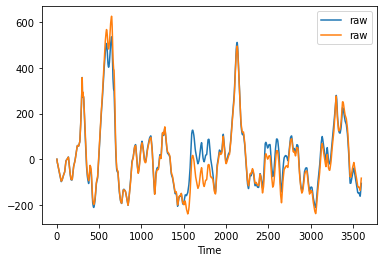

In [11]:
ACE_integral = 0
ACE_raw = 0
raw = -1 * np.ones((3600, 3))
for end_time in range(3600):
    acep = outs['ACE'][(outs['Time'] >= end_time-0.03)&(outs['Time'] <= end_time)].mean()
    ACE_integral += acep
    ACE_raw = -(Kp*acep + Ki*ACE_integral)
    raw[end_time] = [end_time, ACE_raw, ACE_integral]
raws = pd.DataFrame(raw, columns=['Time', 'raw', 'itg'])
    
ACE_integral = 0
ACE_raw = 0
raw = -1 * np.ones((3600, 3))
for end_time in range(3600):
    acep = outf['ACE'][(outf['Time'] >= end_time-0.03)&(outf['Time'] <= end_time)].mean()
    ACE_integral += acep
    ACE_raw = -(Kp*acep + Ki*ACE_integral)
    raw[end_time] = [end_time, ACE_raw, ACE_integral]
rawf = pd.DataFrame(raw, columns=['Time', 'raw', 'itg'])

fig, ax = plt.subplots()
raws.plot(x='Time', y='raw', fig=fig, ax=ax)
rawf.plot(x='Time', y='raw', fig=fig, ax=ax)

In [12]:
# fig, ax = plt.subplots()
# outs.plot(x='Time', y='ACE', fig=fig, ax=ax)
# outf.plot(x='Time', y='ACE', fig=fig, ax=ax)

In [13]:
import matplotlib.font_manager

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


ANDES total load is: 58.564 p.u.


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


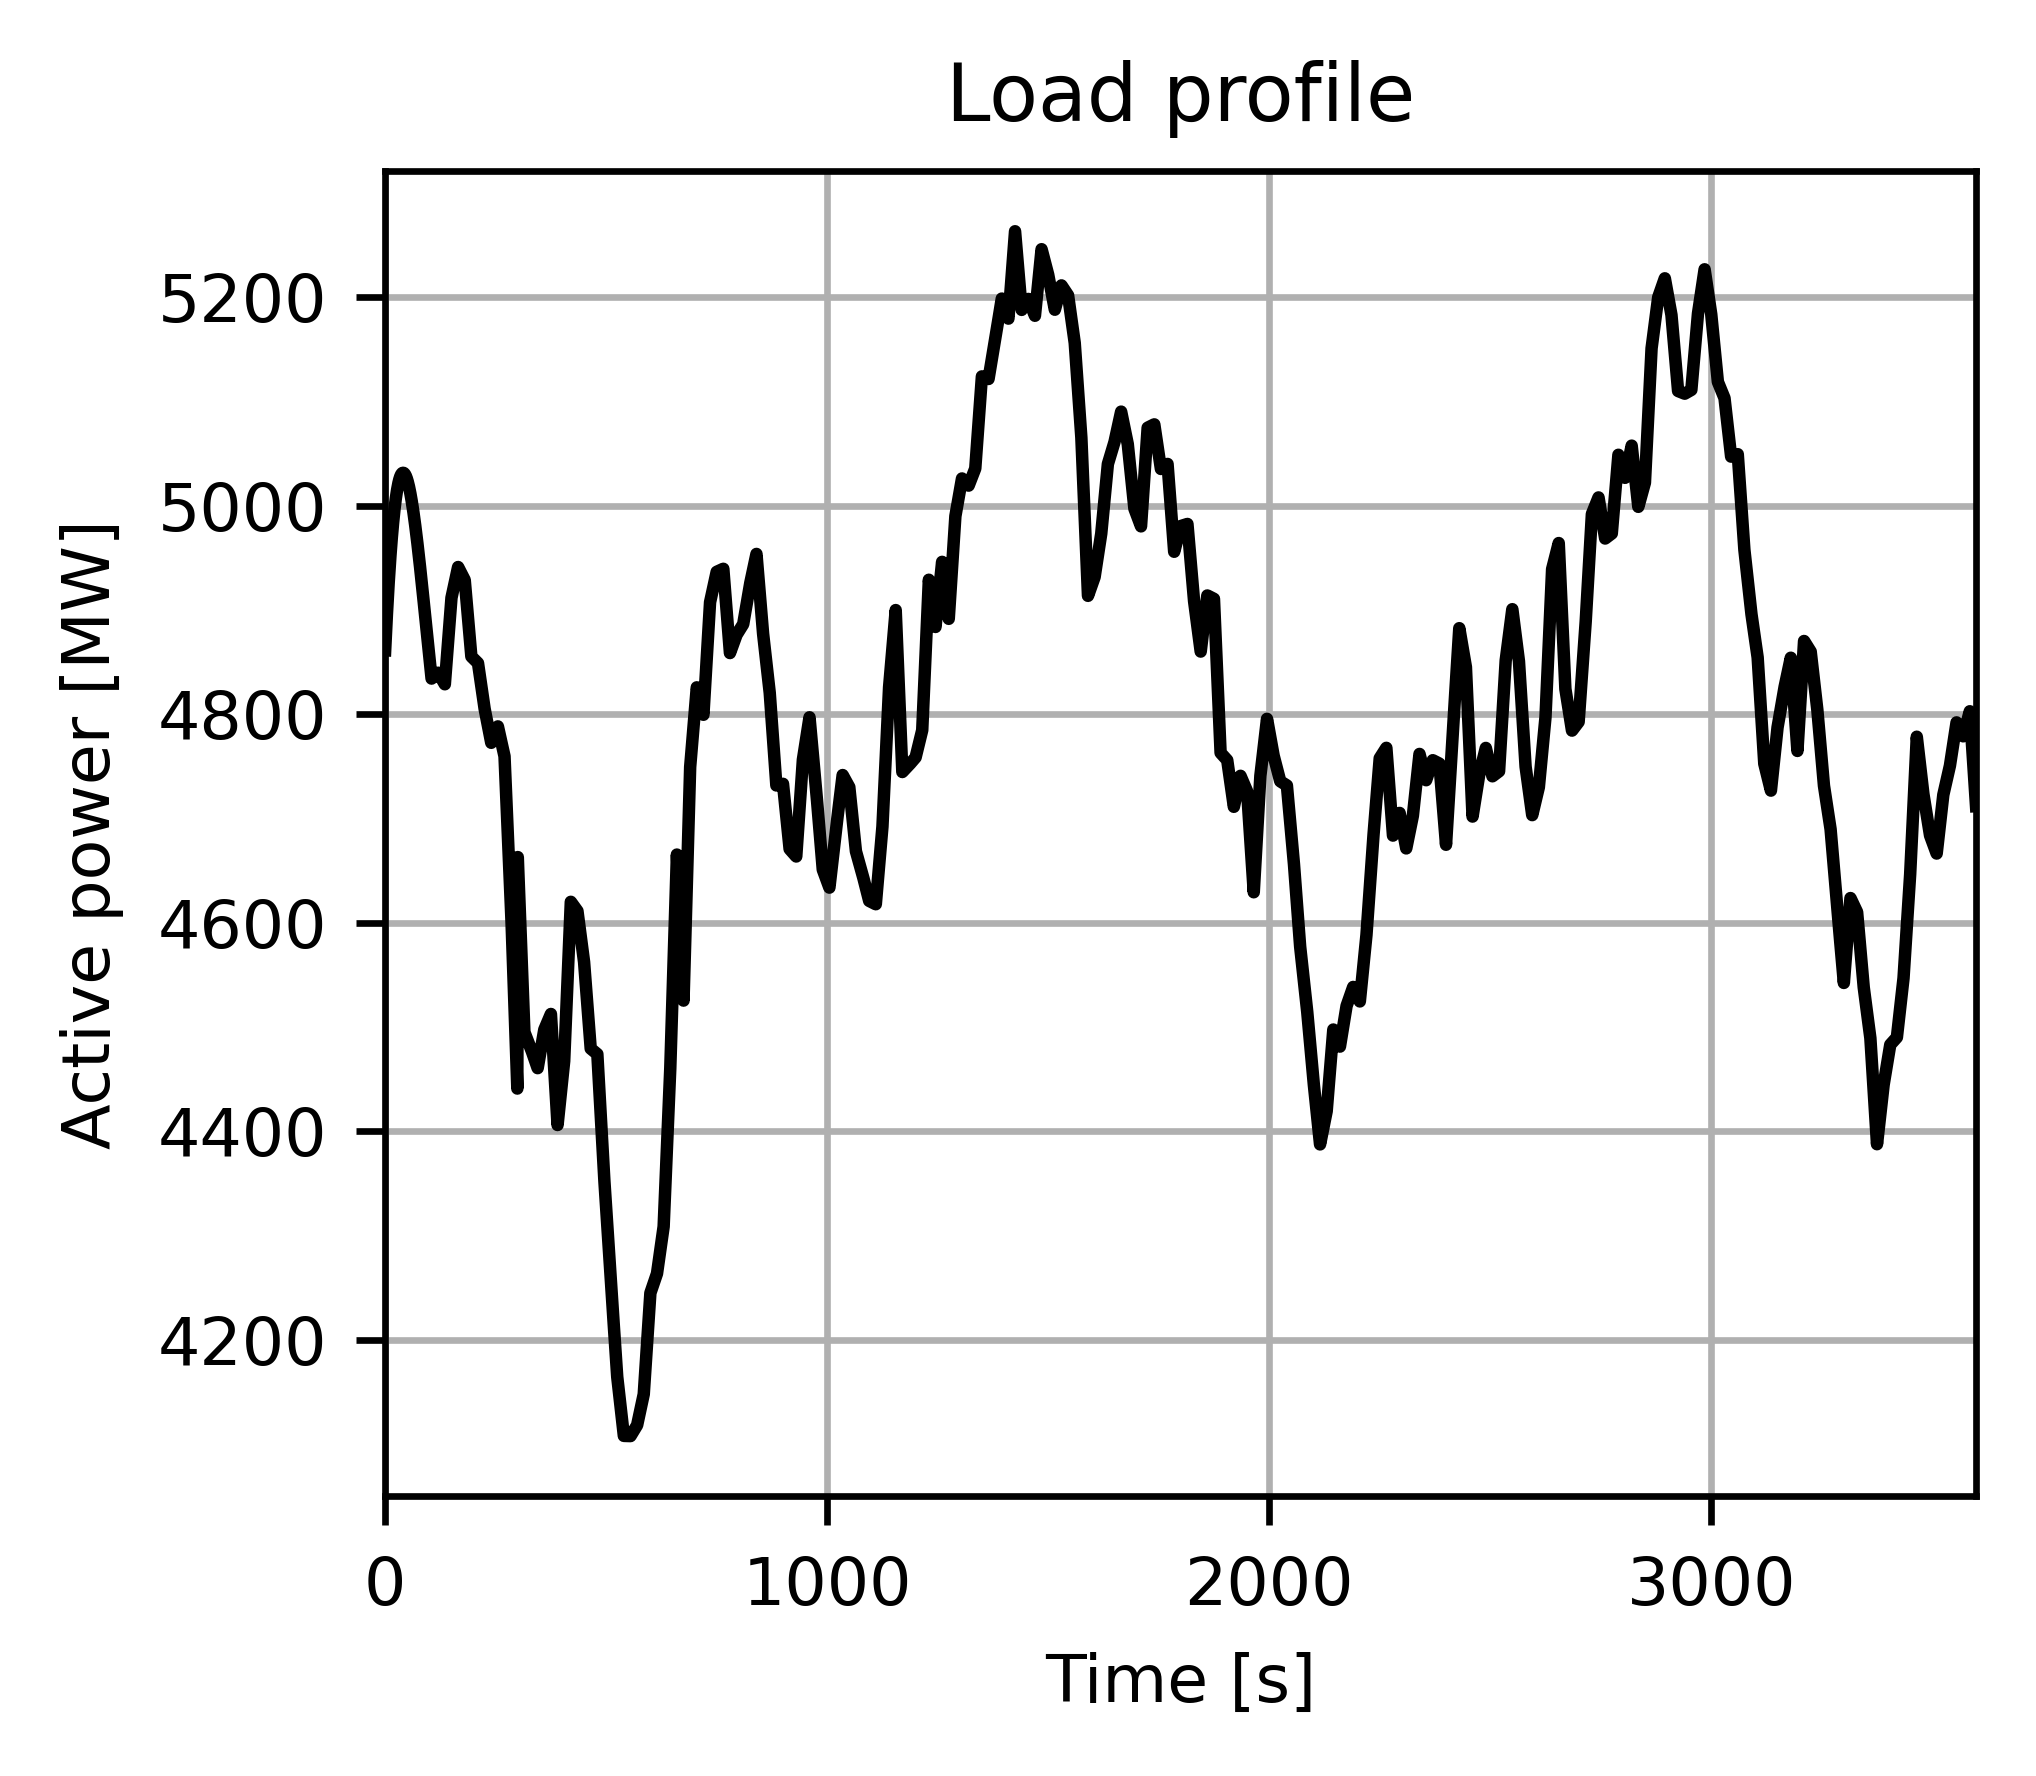

In [14]:
ptotal = ssa.PQ.as_df()['p0'].sum()
print('ANDES total load is:',ptotal.round(4),'p.u.')

# --- scale load curve ---
ddata_path = '/case/dsyn.csv'
ddata = dir_path + ddata_path
d_syn = pd.read_csv(ddata)

caseH = 18

np.random.seed(2022)
col = ['h10', 'h18', 'a10', 'a18']
col1 = ['h10', 'h18']
col2 = ['a10', 'a18']
# d_syn['a10'].iloc[200:650] *= 0.5
d_syn[col1] = (d_syn[col1] - d_syn[col1].min()) / d_syn[col1].min() + 0.8
d_syn[col2] = (d_syn[col2] - d_syn[col2].mean()) / (d_syn[col2].max() - d_syn[col2].min())

if caseH == 10:
    k = 0.4  # the coefficient can be adjusted to fit the case
    d_syn['s10'] = d_syn['h10'] + k * d_syn['a10']
    d_syn['s18'] = d_syn['h18'] + k * d_syn['a18']
    d_syn['sload'] = d_syn['s10']
    # d_syn['sload'] = d_syn['sload'].rolling(10).mean().interpolate(method='polynomial', order=1, inplace=False)
    # d_syn['sload'].iloc[0:310] -= 0.05 * k / 0.3
    # # d_syn['sload'].iloc[250:350] = None
    # # d_syn['sload'].iloc[250:350].interpolate(method='polynomial', order=3, inplace=True)
    # d_syn['sload'].iloc[400:650] += 2 * (0.8 - d_syn['sload'].iloc[300:600])
    # d_syn['sload'].iloc[600:900] += 0.02 * k / 0.3
    # # d_syn['sload'].iloc[450:650] = None
    # # d_syn['sload'].iloc[450:650].interpolate(method='polynomial', order=9, inplace=True)
    # d_syn['sload'].iloc[900:1200] += 0.03 * k / 0.3
    # d_syn['sload'].iloc[1200:1800] -= 0.06 * k / 0.3
    # d_syn['sload'].iloc[2100:2400] += 0.02 * k / 0.3
    # d_syn['sload'].iloc[2700:3000] -= 0.03 * k / 0.3
    # d_syn['sload'].iloc[3300:3600] += 0.05 * k / 0.3
if caseH == 18:
    k = 0.2  # the coefficient can be adjusted to fit the case
    d_syn['s10'] = d_syn['h10'] + k * d_syn['a10']
    d_syn['s18'] = d_syn['h18'] + k * d_syn['a18']
    d_syn['sload'] = d_syn['s10']
    d_syn['sload'].iloc[0:300] -= 0.2 * k
    # d_syn['sload'].iloc[200:700] = d_syn['sload'].iloc[200:700].rolling(80).mean()

    # d_syn['sload'] = d_syn['sload'].rolling(10).mean().interpolate(method='polynomial', order=1, inplace=False)
    # d_syn['sload'].iloc[100:600] = d_syn['sload'].iloc[100:600].rolling(10).mean().interpolate(method='polynomial', order=1, inplace=False)

# calculate expected load
step = 300
d_exp = d_syn.groupby(d_syn.index // step).mean().copy()
d_exp['time'] = range(0,3600,300)

# align starting point of load with starting point of dispatch results
d_syn['sload'][0] = d_exp['sload'].iloc[0]
d_syn['sload'][1:100] = None
d_syn['sload'] = d_syn['sload'].interpolate(method='polynomial', order=3)

plt.style.use('ieee')
# --- plot load curve ---
fig_load, ax_load = plt.subplots(figsize=(3.5, 3))
ax_load.plot(d_syn['time'], ptotal * ssa.config.mva * d_syn['sload'], linestyle='-')
ax_load.set_xlim([0, 3600])
ax_load.set_ylabel('Active power [MW]')
ax_load.set_xlabel('Time [s]')
ax_load.set_title('Load profile')
ax_load.grid()
plt.tight_layout()
# fig_load.savefig("load_curve.png", bbox_inches="tight")

In [15]:
noagcev = evagcf.abs().sum() == 0
noagcev = noagcev[noagcev].index
noagcev

Int64Index([   6,   10,   14,   32,   42,   60,   74,   76,   86,   98,
            ...
            1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1599],
           dtype='int64', length=271)

/home/jwang175/mambaforge/envs/andes/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


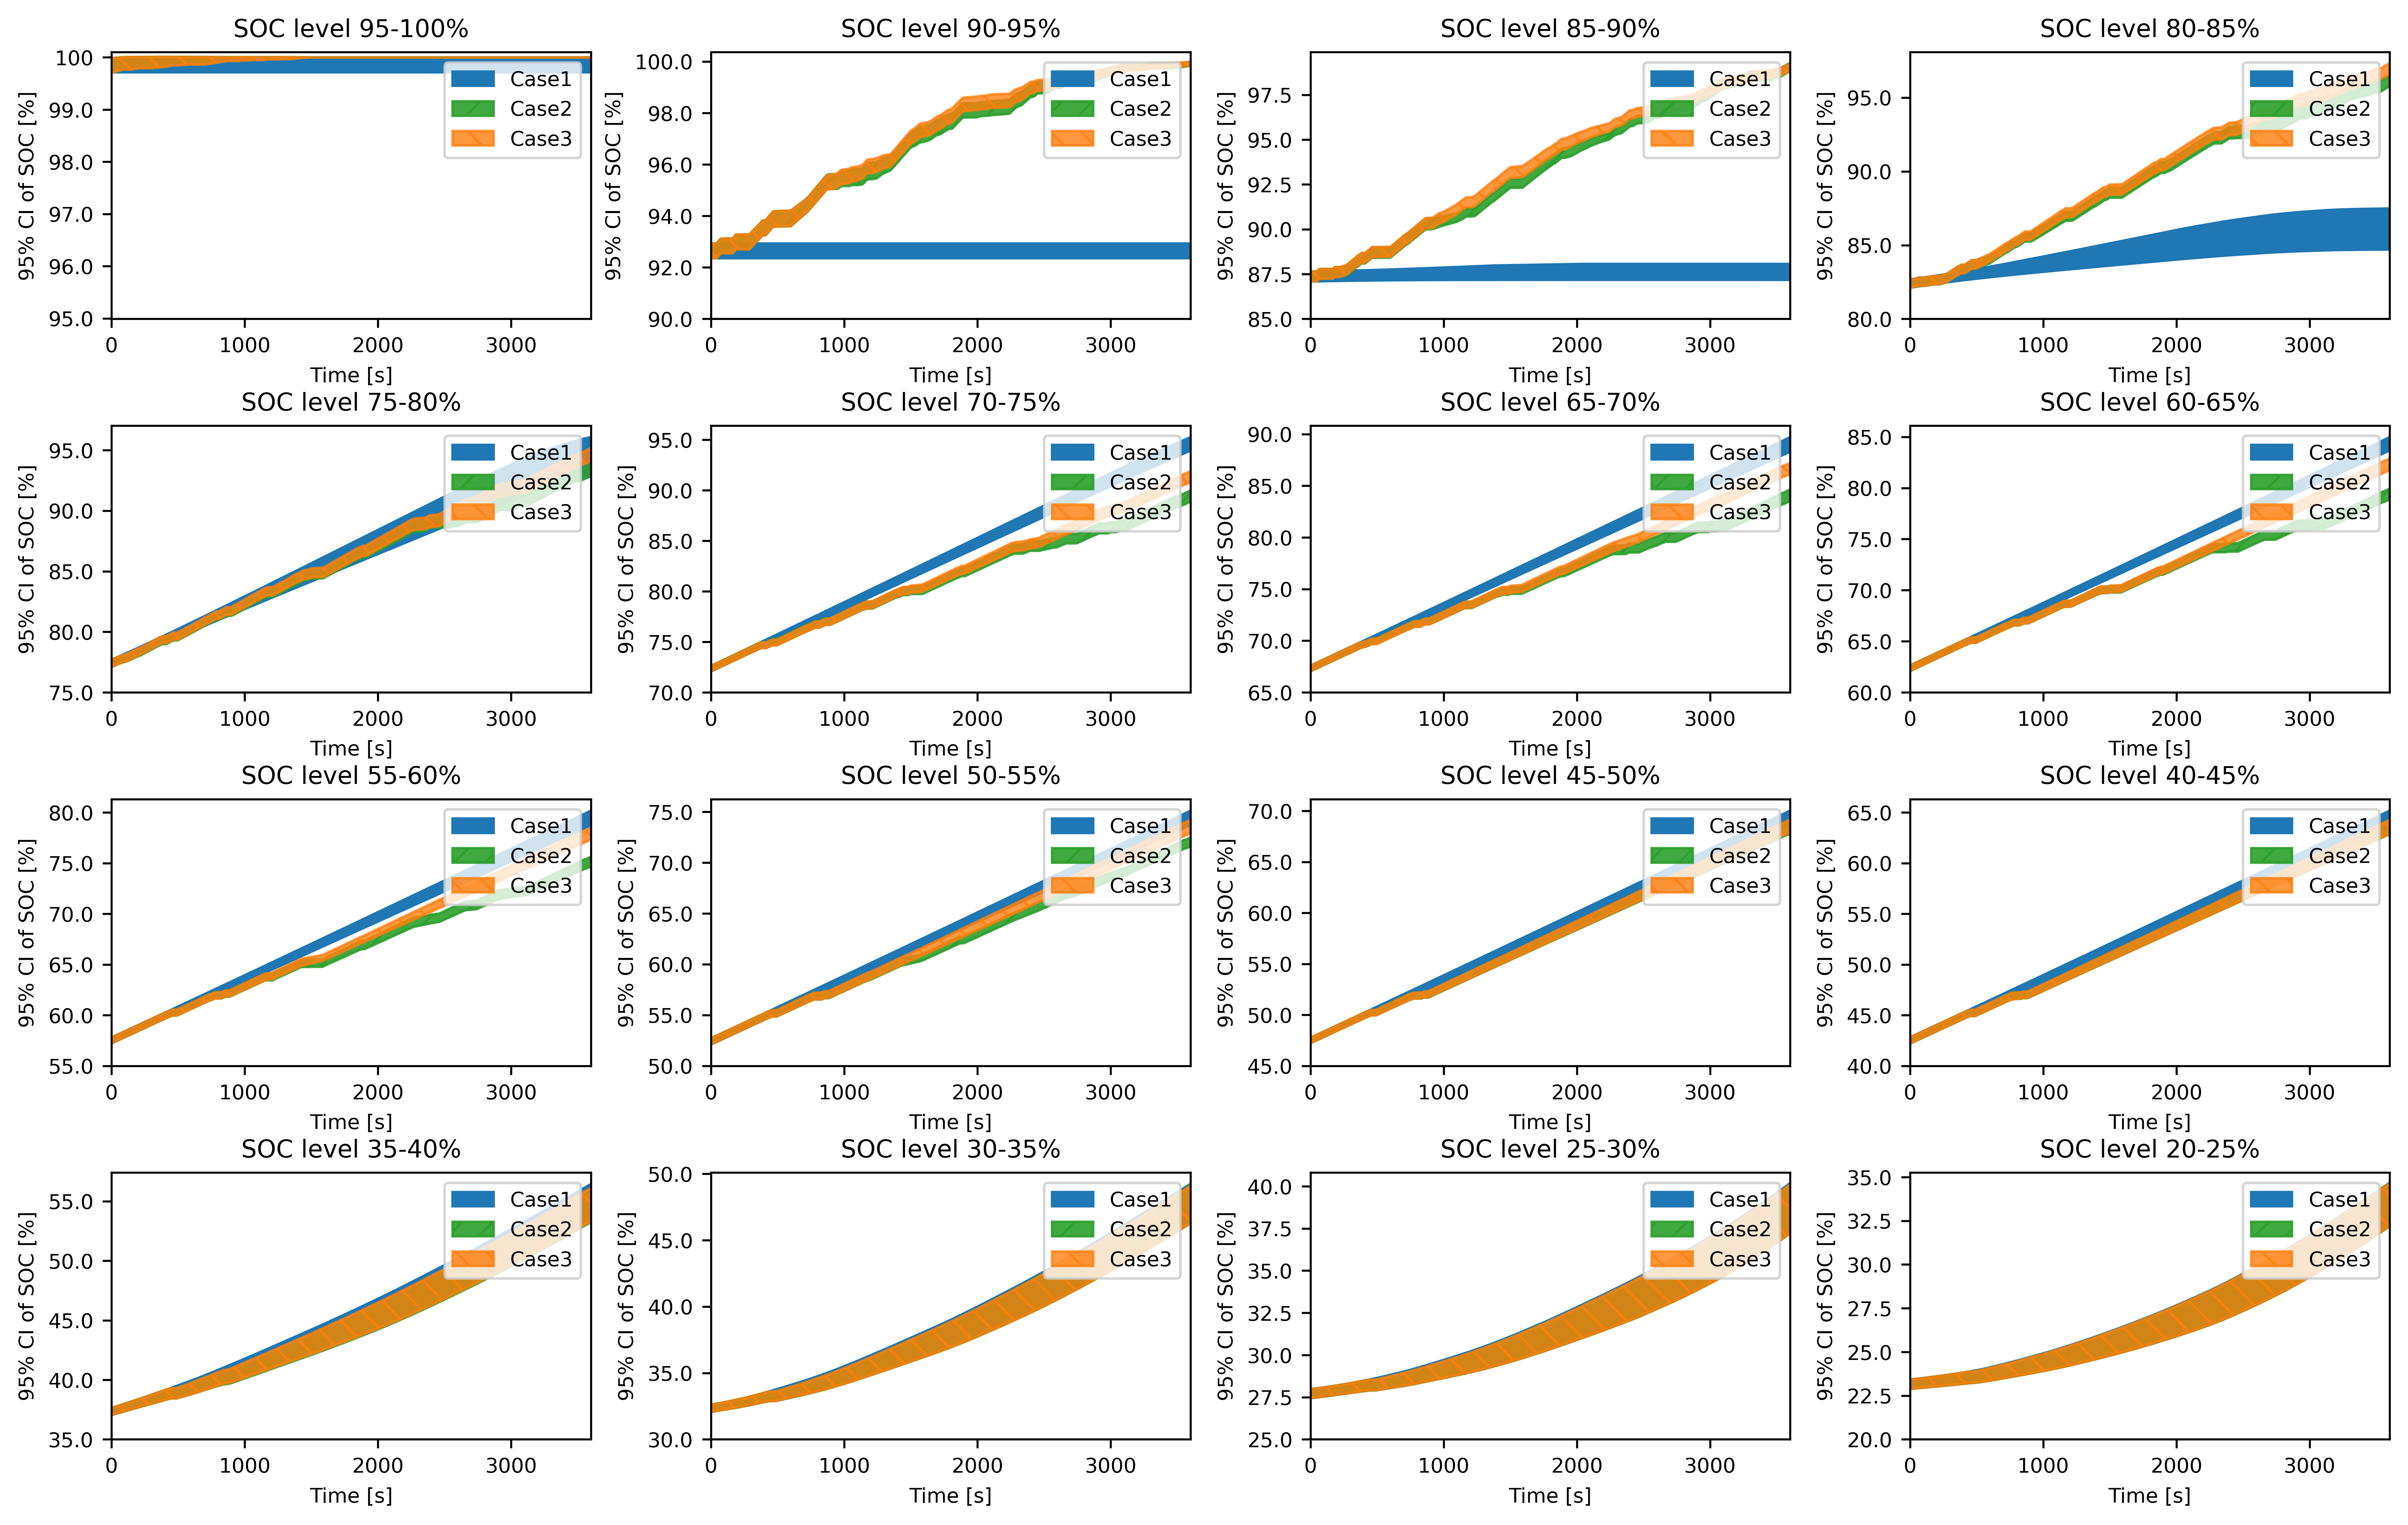

In [16]:
col_index = []
for k in range(0, 16):
    col_index = col_index + [list(np.array(range(0, 100)) + 100*k)]
col = []
for c in col_index:
    col = col + [list(evsocf.columns[[c]].values)]

fig, ax = plt.subplots(4, 4, figsize=(16, 10))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.25, hspace=0.4)

alpha=0.8
for i in range(4):
    for j in range(4):
        idx = 15 - (4*i + j)
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:blue', hatch='||', alpha=1, label=f'Case1',
                              y1=evsocs[col[idx]].mean(axis=1) + 1.96 * evsocs[col[idx]].sem(axis=1),
                              y2=evsocs[col[idx]].mean(axis=1) - 1.96 * evsocs[col[idx]].sem(axis=1))
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:green', hatch='//', alpha=0.9, label=f'Case2',
                              y1=evsocfn[col[idx]].mean(axis=1) + 1.96 * evsocfn[col[idx]].sem(axis=1),
                              y2=evsocfn[col[idx]].mean(axis=1) - 1.96 * evsocfn[col[idx]].sem(axis=1))
        ax[i, j].fill_between(range(3600), linestyle='-', color='tab:orange', hatch='\\\\', alpha=0.8, label=f'Case3',
                              y1=evsocf[col[idx]].mean(axis=1) + 1.96 * evsocf[col[idx]].sem(axis=1),
                              y2=evsocf[col[idx]].mean(axis=1) - 1.96 * evsocf[col[idx]].sem(axis=1))
        ax[i, j].legend()
        ax[i, j].set_xlim([0, 3600])
        ax[i, j].set_xlabel('Time [s]')
        ax[i, j].set_ylabel('95% CI of SOC [%]')
        yticks = list(ax[i, j].get_yticks())
        ax[i, j].set_yticks(yticks[0:-1], [np.round(ytk*100, 4) for ytk in yticks[0:-1]])
        ax[i, j].set_title(f'SOC level {idx*5+20}-{idx*5+25}%')
#         ax[i, j].set_ylim([0.58, 1.02])

ax[0, 0].set_ylim([0.9499, 1.001])
ax[0, 0].set_yticks([0.95, 0.96, 0.97, 0.98, 0.99, 1], [np.round(ytk*100, 4) for ytk in [0.95, 0.96, 0.97, 0.98, 0.99, 1]])
# ax[0, 1].set_ylim([0.899, 0.9501])
# ax[0, 1].set_yticks([0.9, 0.91, 0.92, 0.93, 0.94, 0.95], [np.round(ytk*100, 4) for ytk in [0.9, 0.91, 0.92, 0.93, 0.94, 0.95]])
# ax[0, 2].set_ylim([0.849, 0.901])
# ax[0, 2].set_yticks([0.85, 0.86, 0.87, 0.88, 0.89, 0.9], [np.round(ytk*100, 4) for ytk in [0.85, 0.86, 0.87, 0.88, 0.89, 0.9]])

/home/jwang175/mambaforge/envs/andes/lib/python3.9/site-packages/pandas/core/indexes/base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


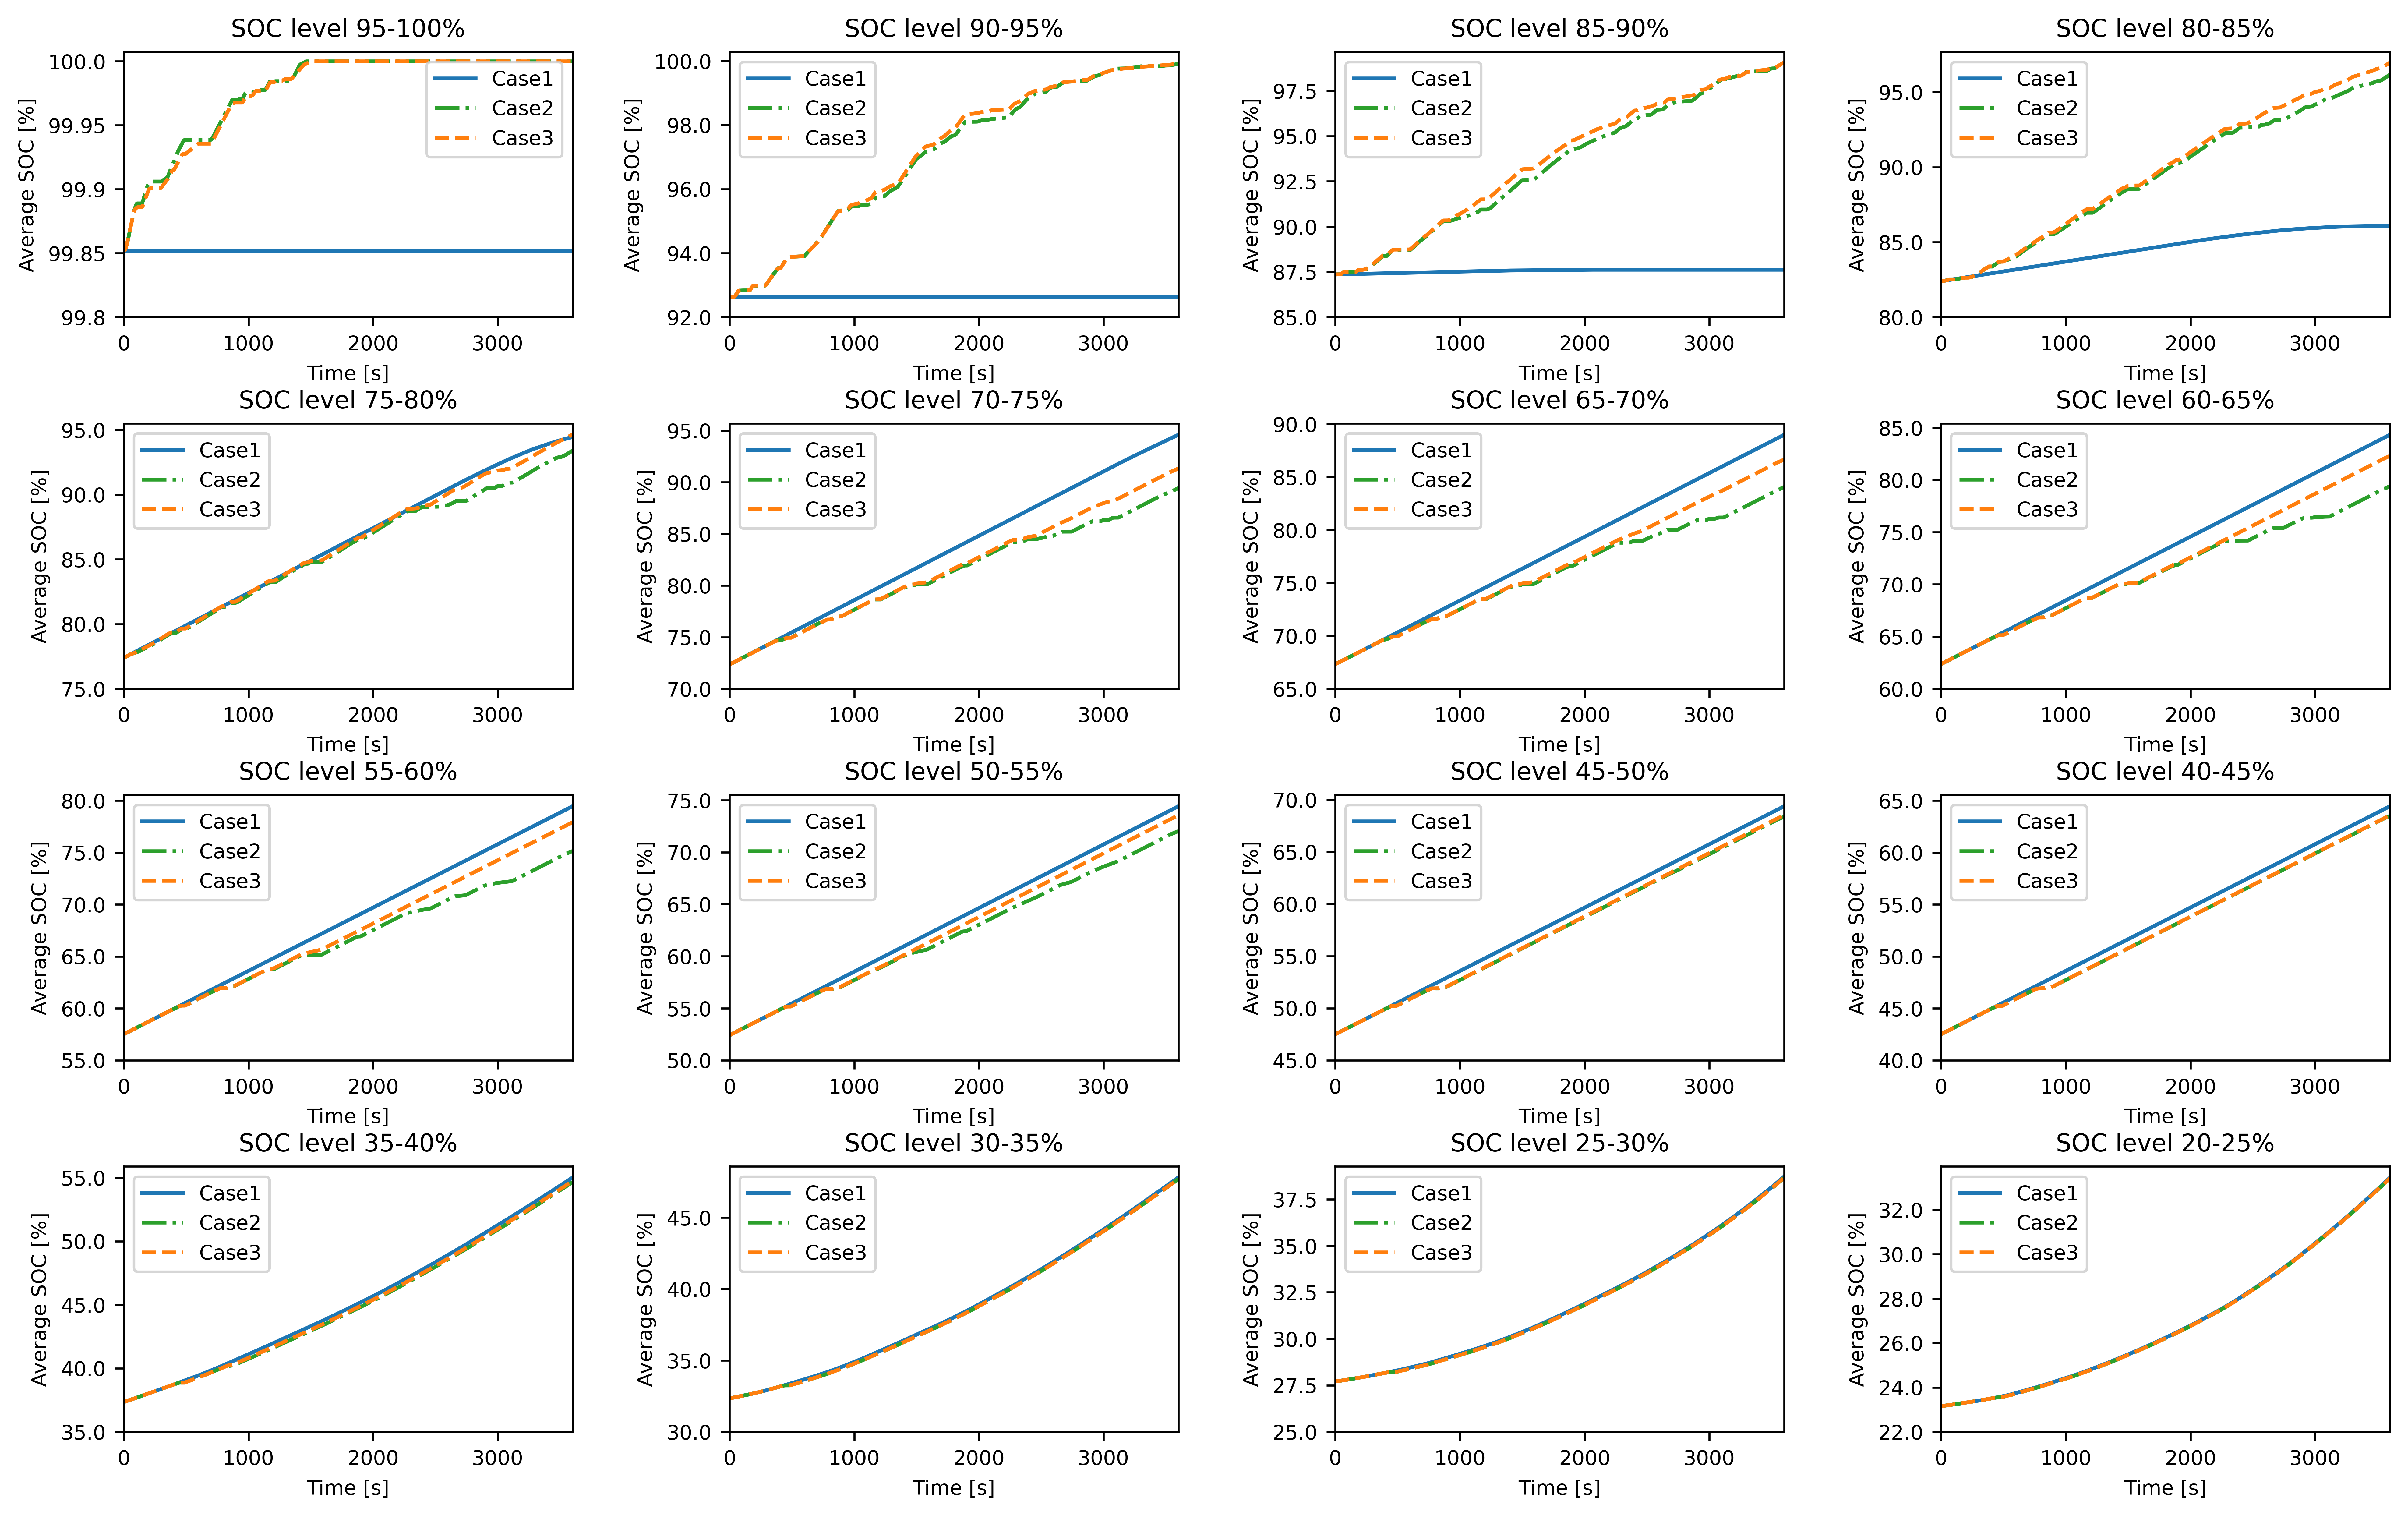

In [17]:
col_index = []
for k in range(0, 16):
    col_index = col_index + [list(np.array(range(0, 100)) + 100*k)]
col = []
for c in col_index:
    col = col + [list(evsocf.columns[[c]].values)]

fig, ax = plt.subplots(4, 4, figsize=(16, 10))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.35, hspace=0.4)

for i in range(4):
    for j in range(4):
        idx = 15 - (4*i + j)
        ax[i, j].plot(range(3600), evsocs[col[idx]].mean(axis=1), linestyle='-', color='tab:blue', label=f'Case1')
        ax[i, j].plot(range(3600), evsocfn[col[idx]].mean(axis=1), linestyle='-.', color='tab:green', label=f'Case2')
        ax[i, j].plot(range(3600), evsocf[col[idx]].mean(axis=1), linestyle='--', color='tab:orange', label=f'Case3')
        ax[i, j].legend()
        ax[i, j].set_xlim([0, 3600])
        ax[i, j].set_xlabel('Time [s]')
        ax[i, j].set_ylabel('Average SOC [%]')
        yticks = list(ax[i, j].get_yticks())
        ax[i, j].set_yticks(yticks[0:-1], [np.round(ytk*100, 4) for ytk in yticks[0:-1]])
        ax[i, j].set_title(f'SOC level {idx*5+20}-{idx*5+25}%')
#         ax[i, j].set_ylim([0.58, 1.02])

In [18]:
# calculation of increased charging time

def ict(evdf, caseH):
    """Calculate increased charging time"""
    evdf['ict'] = 0
    # for left cars
    evdf[(evdf.tf <= 19) & (evdf['soc'] < evdf['socd'])] # no EV in this level for now

    # for staying cars, calculate
    evdf['soc0'] = sse.ev.soc
    evdf['dsoc'] = evdf['soc'] - evdf['soc0']  # delta SOC
    evdf['psoc'] = evdf['dsoc'] * (evdf['tf'] - caseH) # predict SOC level when participating SFR
    ridx = evdf[(evdf.tf > 19) & (evdf['soc'] < evdf['socd'])].index # EV row index
    # power0, - actual power
    # supposed obtained charging power if no AGC
    # evdf['Pc'].iloc[ridx] * evdf['nc'].iloc[ridx] * (evdf['tf'].iloc[ridx]  - 18)
    # predicted power when participating the 
    # evdf['psoc'].iloc[ridx] * evdf['psoc'].iloc[ridx]
    evdf['ict'].iloc[ridx] = (evdf['Pc'].iloc[ridx] * evdf['nc'].iloc[ridx] * (evdf['tf'].iloc[ridx]  - caseH) \
                             - evdf['psoc'].iloc[ridx] * evdf['Q'].iloc[ridx]) \
                            / evdf['Pc'].iloc[ridx] / evdf['nc'].iloc[ridx] * 60  # to minute
    evdf.drop(columns=['soc0', 'dsoc', 'psoc'], inplace=True)
    return evdf
evdf = ict(evdf, caseH)
evdfn = ict(evdfn, caseH)
evds = ict(evds, caseH)

Text(0.5, 1.0, 'Tolerance of increased charging time')

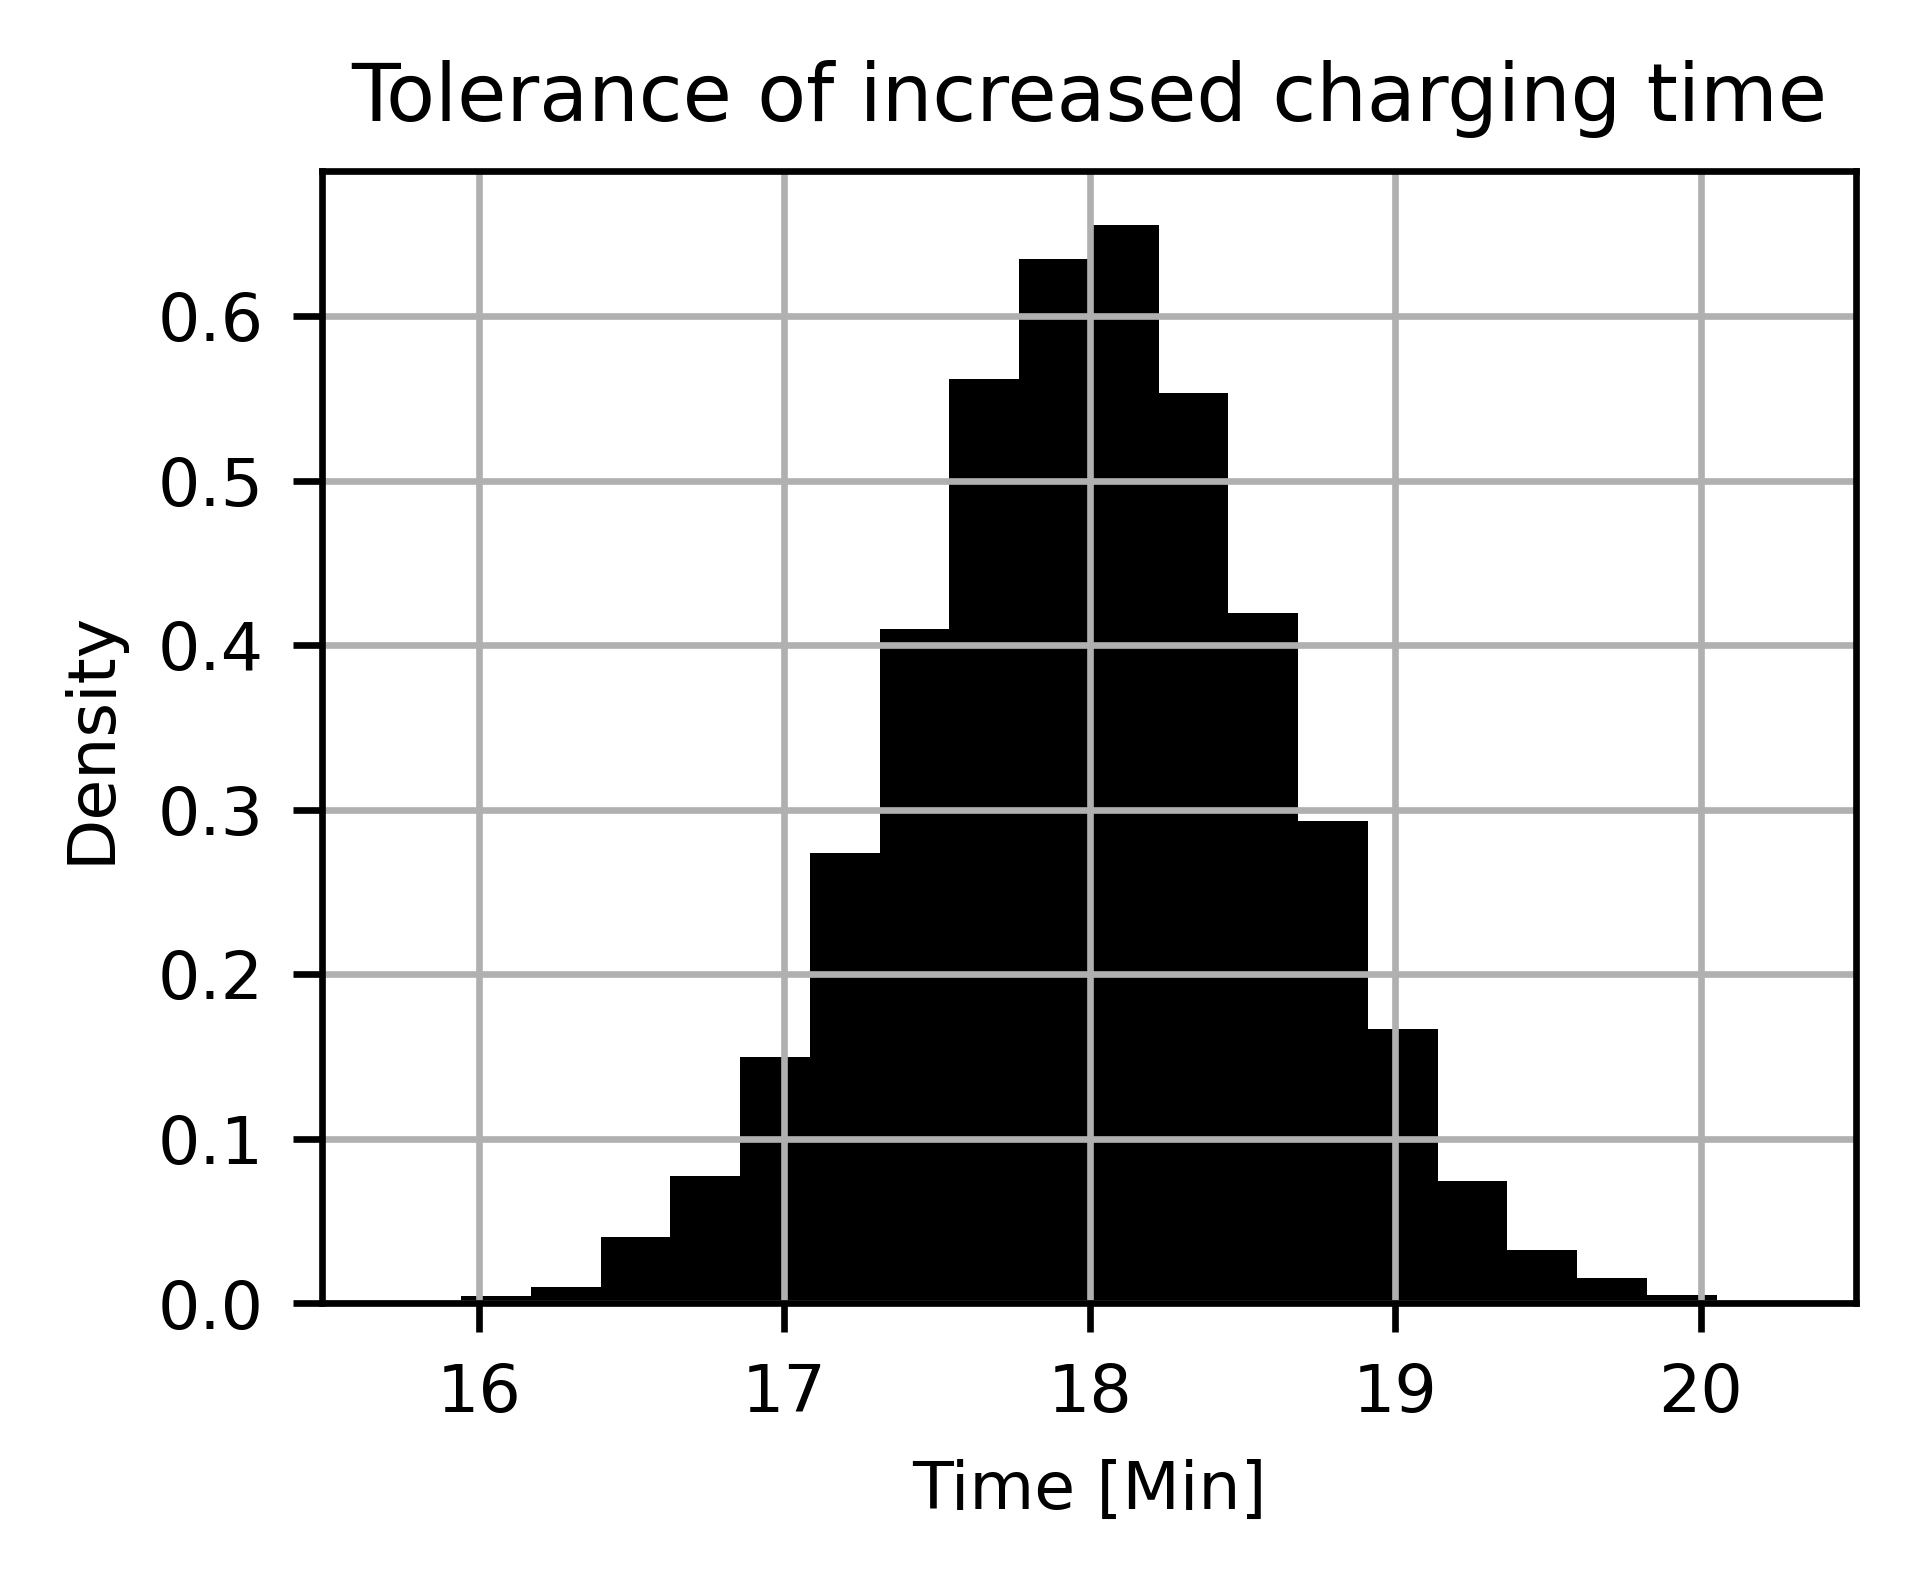

In [19]:
fig, ax = plt.subplots()
evdf.tt *= 60
evdf.tt.hist(density=True, ax=ax, bins=20)
ax.set_xlabel('Time [Min]')
ax.set_ylabel('Density')
ax.set_title('Tolerance of increased charging time')

Text(0.5, 1.0, 'Increased charging time')

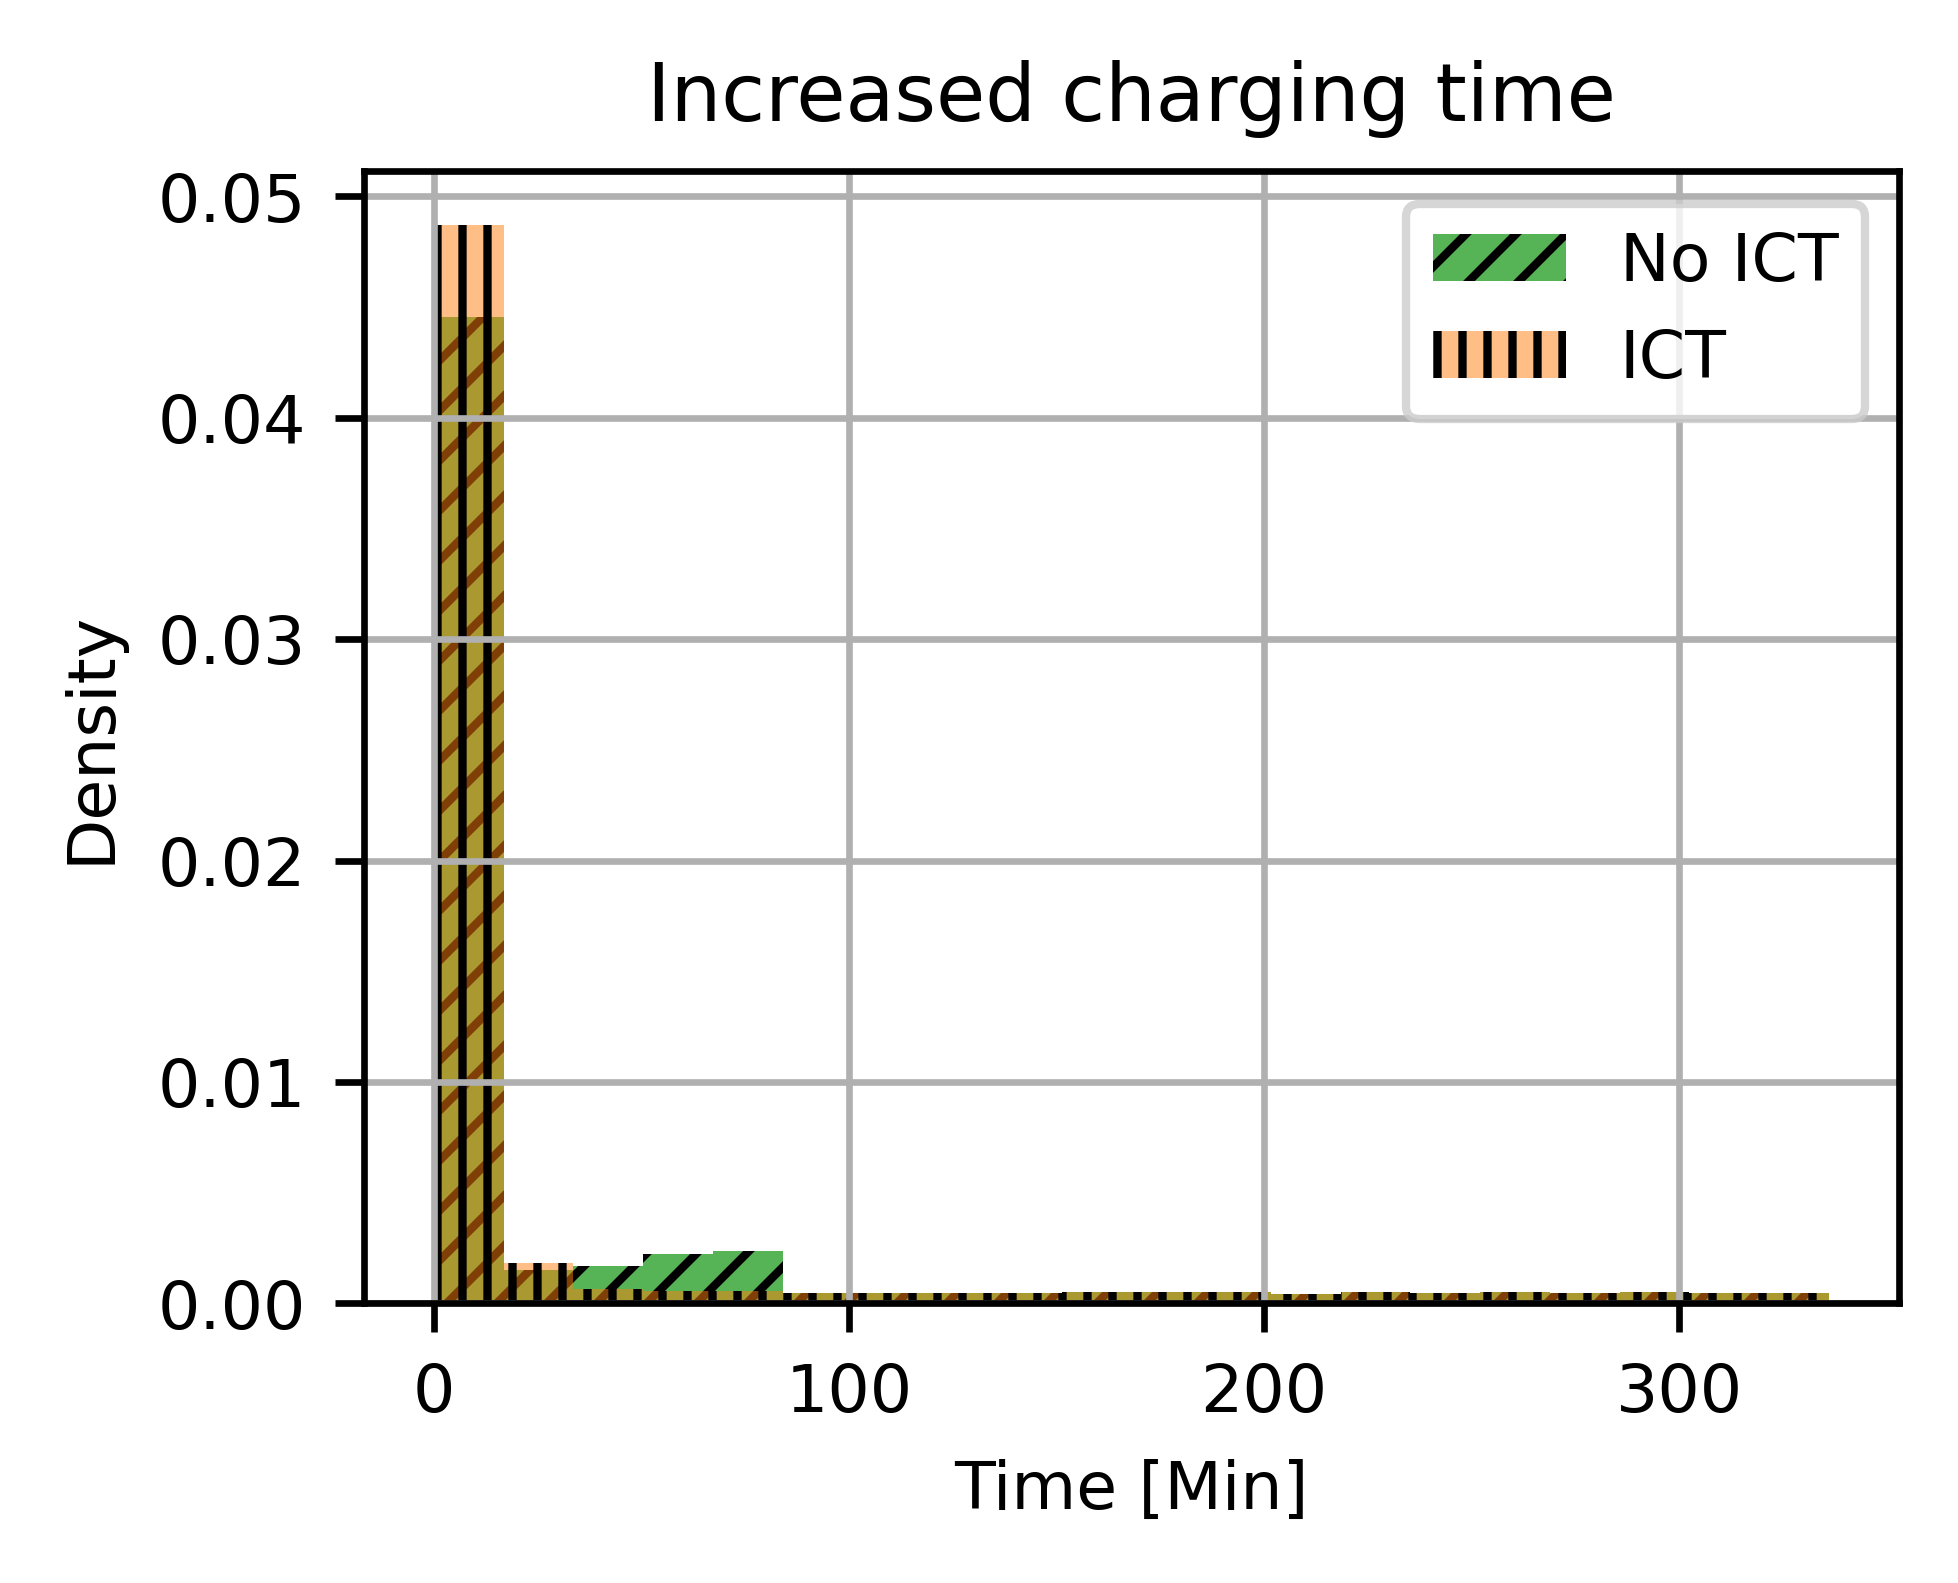

In [20]:
fig, ax = plt.subplots()
evdfn.ict.hist(ax=ax, density=True, bins=20, alpha=0.8, label='No ICT', hatch='////', color='tab:green')
evdf.ict.hist(ax=ax, density=True, bins=20, alpha=0.5, label='ICT', hatch='||||', color='tab:orange')
ax.legend()
ax.set_xlabel('Time [Min]')
ax.set_ylabel('Density')
ax.set_title('Increased charging time')

Text(0.5, 1.0, 'Increased charging time')

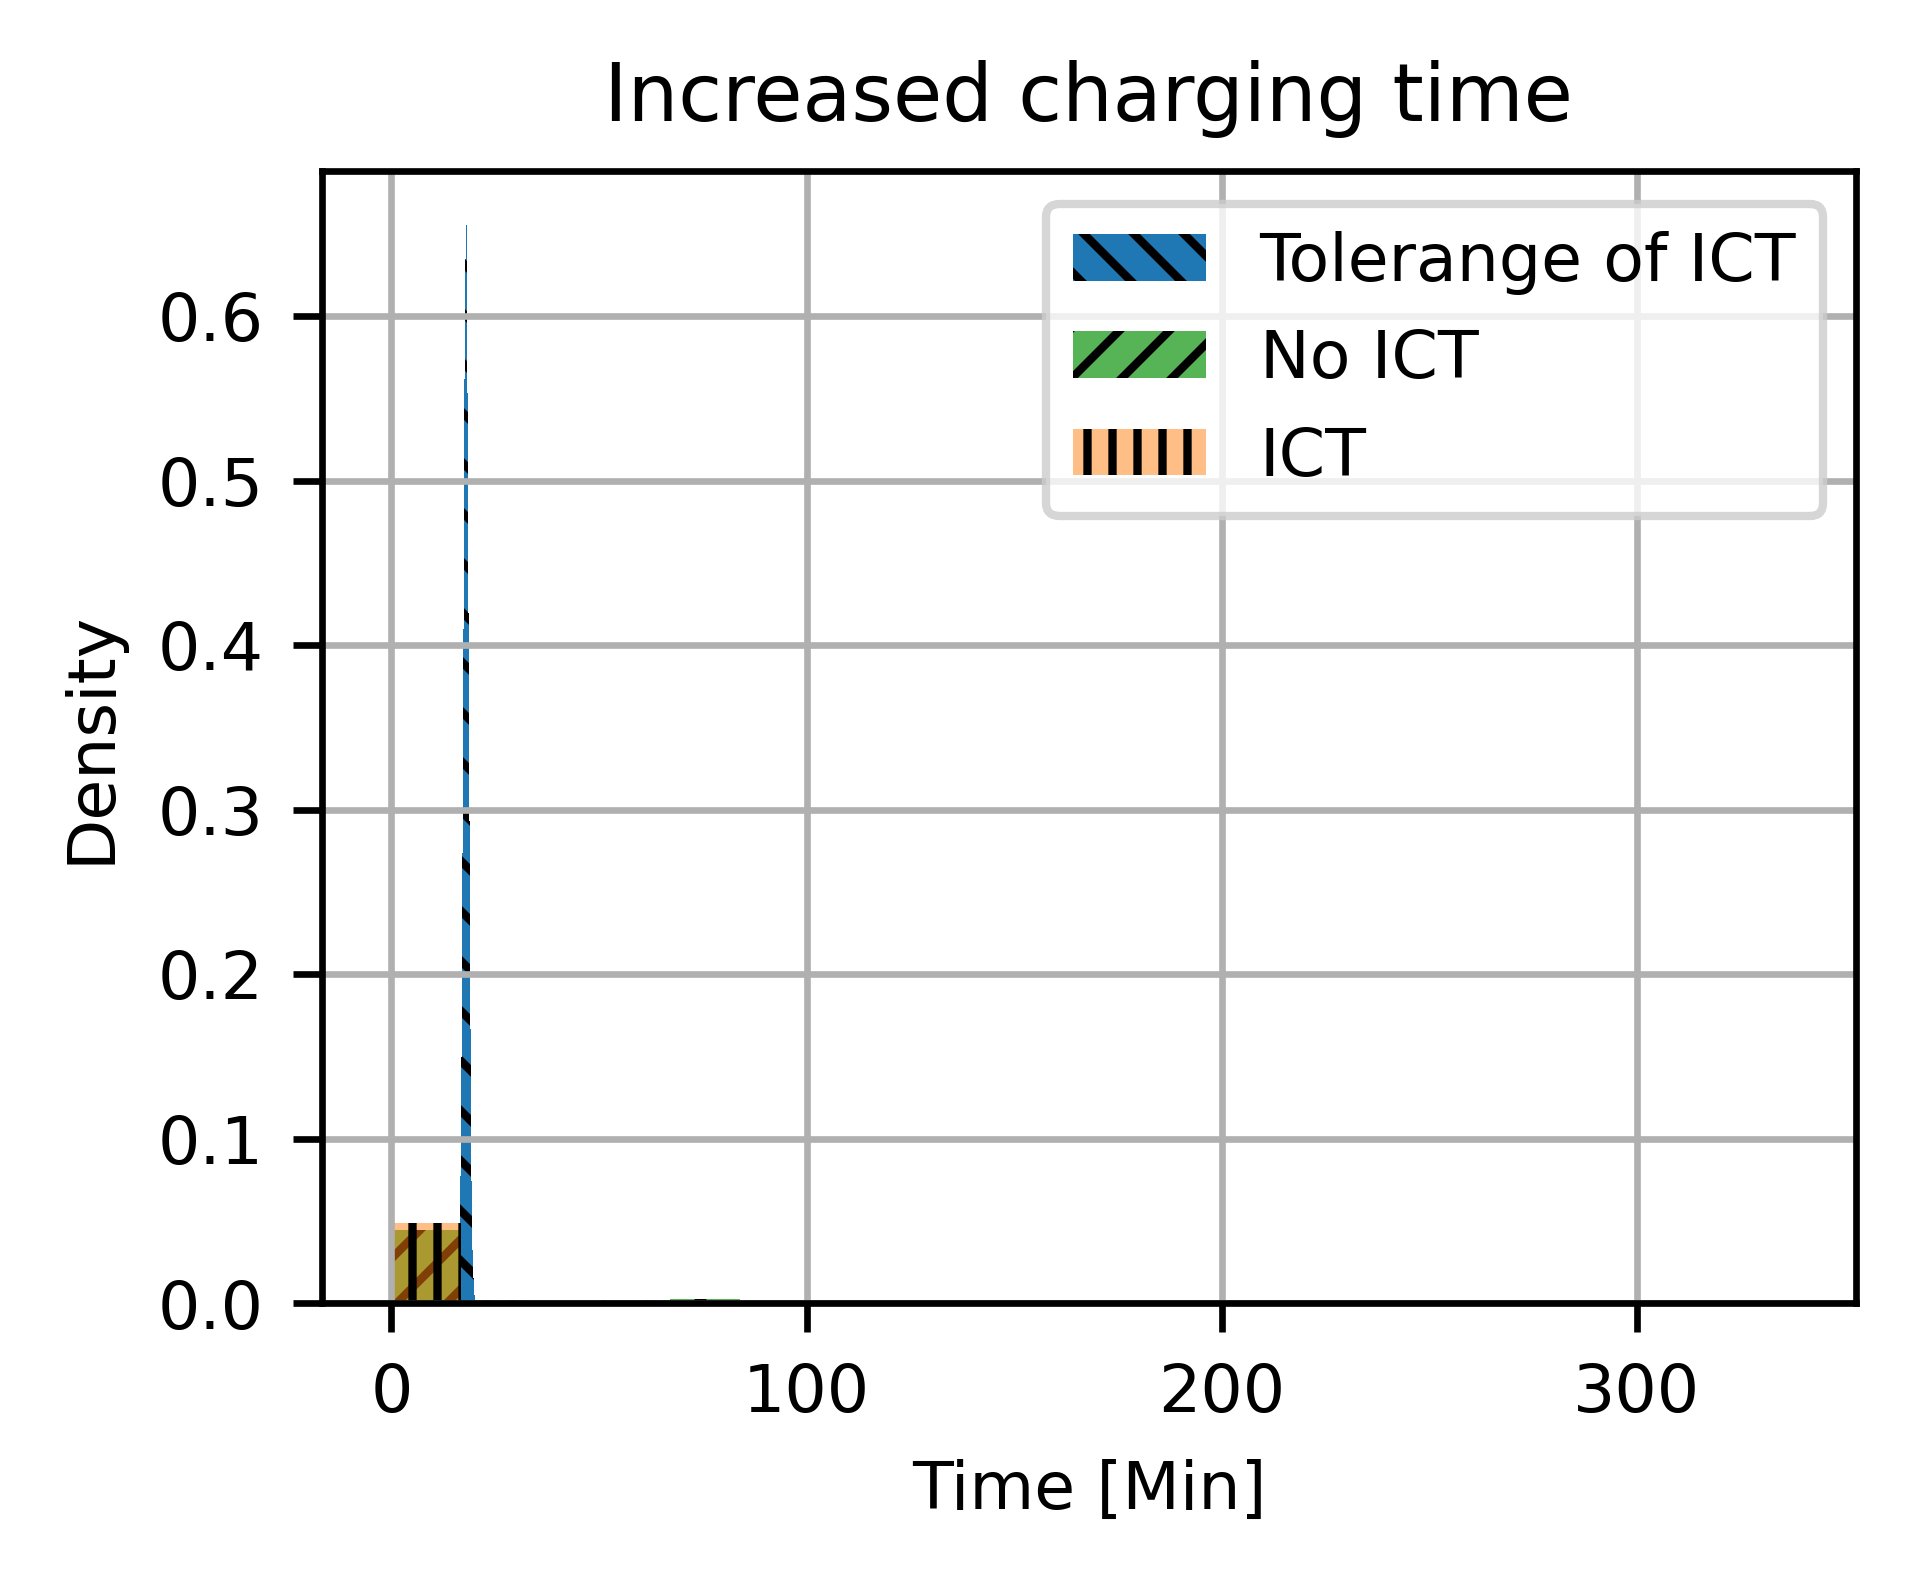

In [21]:
fig, ax = plt.subplots()
evdf.tt.hist(ax=ax, density=True, bins=20, alpha=1, label='Tolerange of ICT', hatch='\\\\\\\\', color='tab:blue')
evdfn.ict.hist(ax=ax, density=True, bins=20, alpha=0.8, label='No ICT', hatch='////', color='tab:green')
evdf.ict.hist(ax=ax, density=True, bins=20, alpha=0.5, label='ICT', hatch='||||', color='tab:orange')
ax.legend()
ax.set_xlabel('Time [Min]')
ax.set_ylabel('Density')
ax.set_title('Increased charging time')

In [22]:
# actual delayed time
# plt.scatter(sse.ev.ts, sse.ev.na)

Text(0, 0.5, 'Time [Min]')

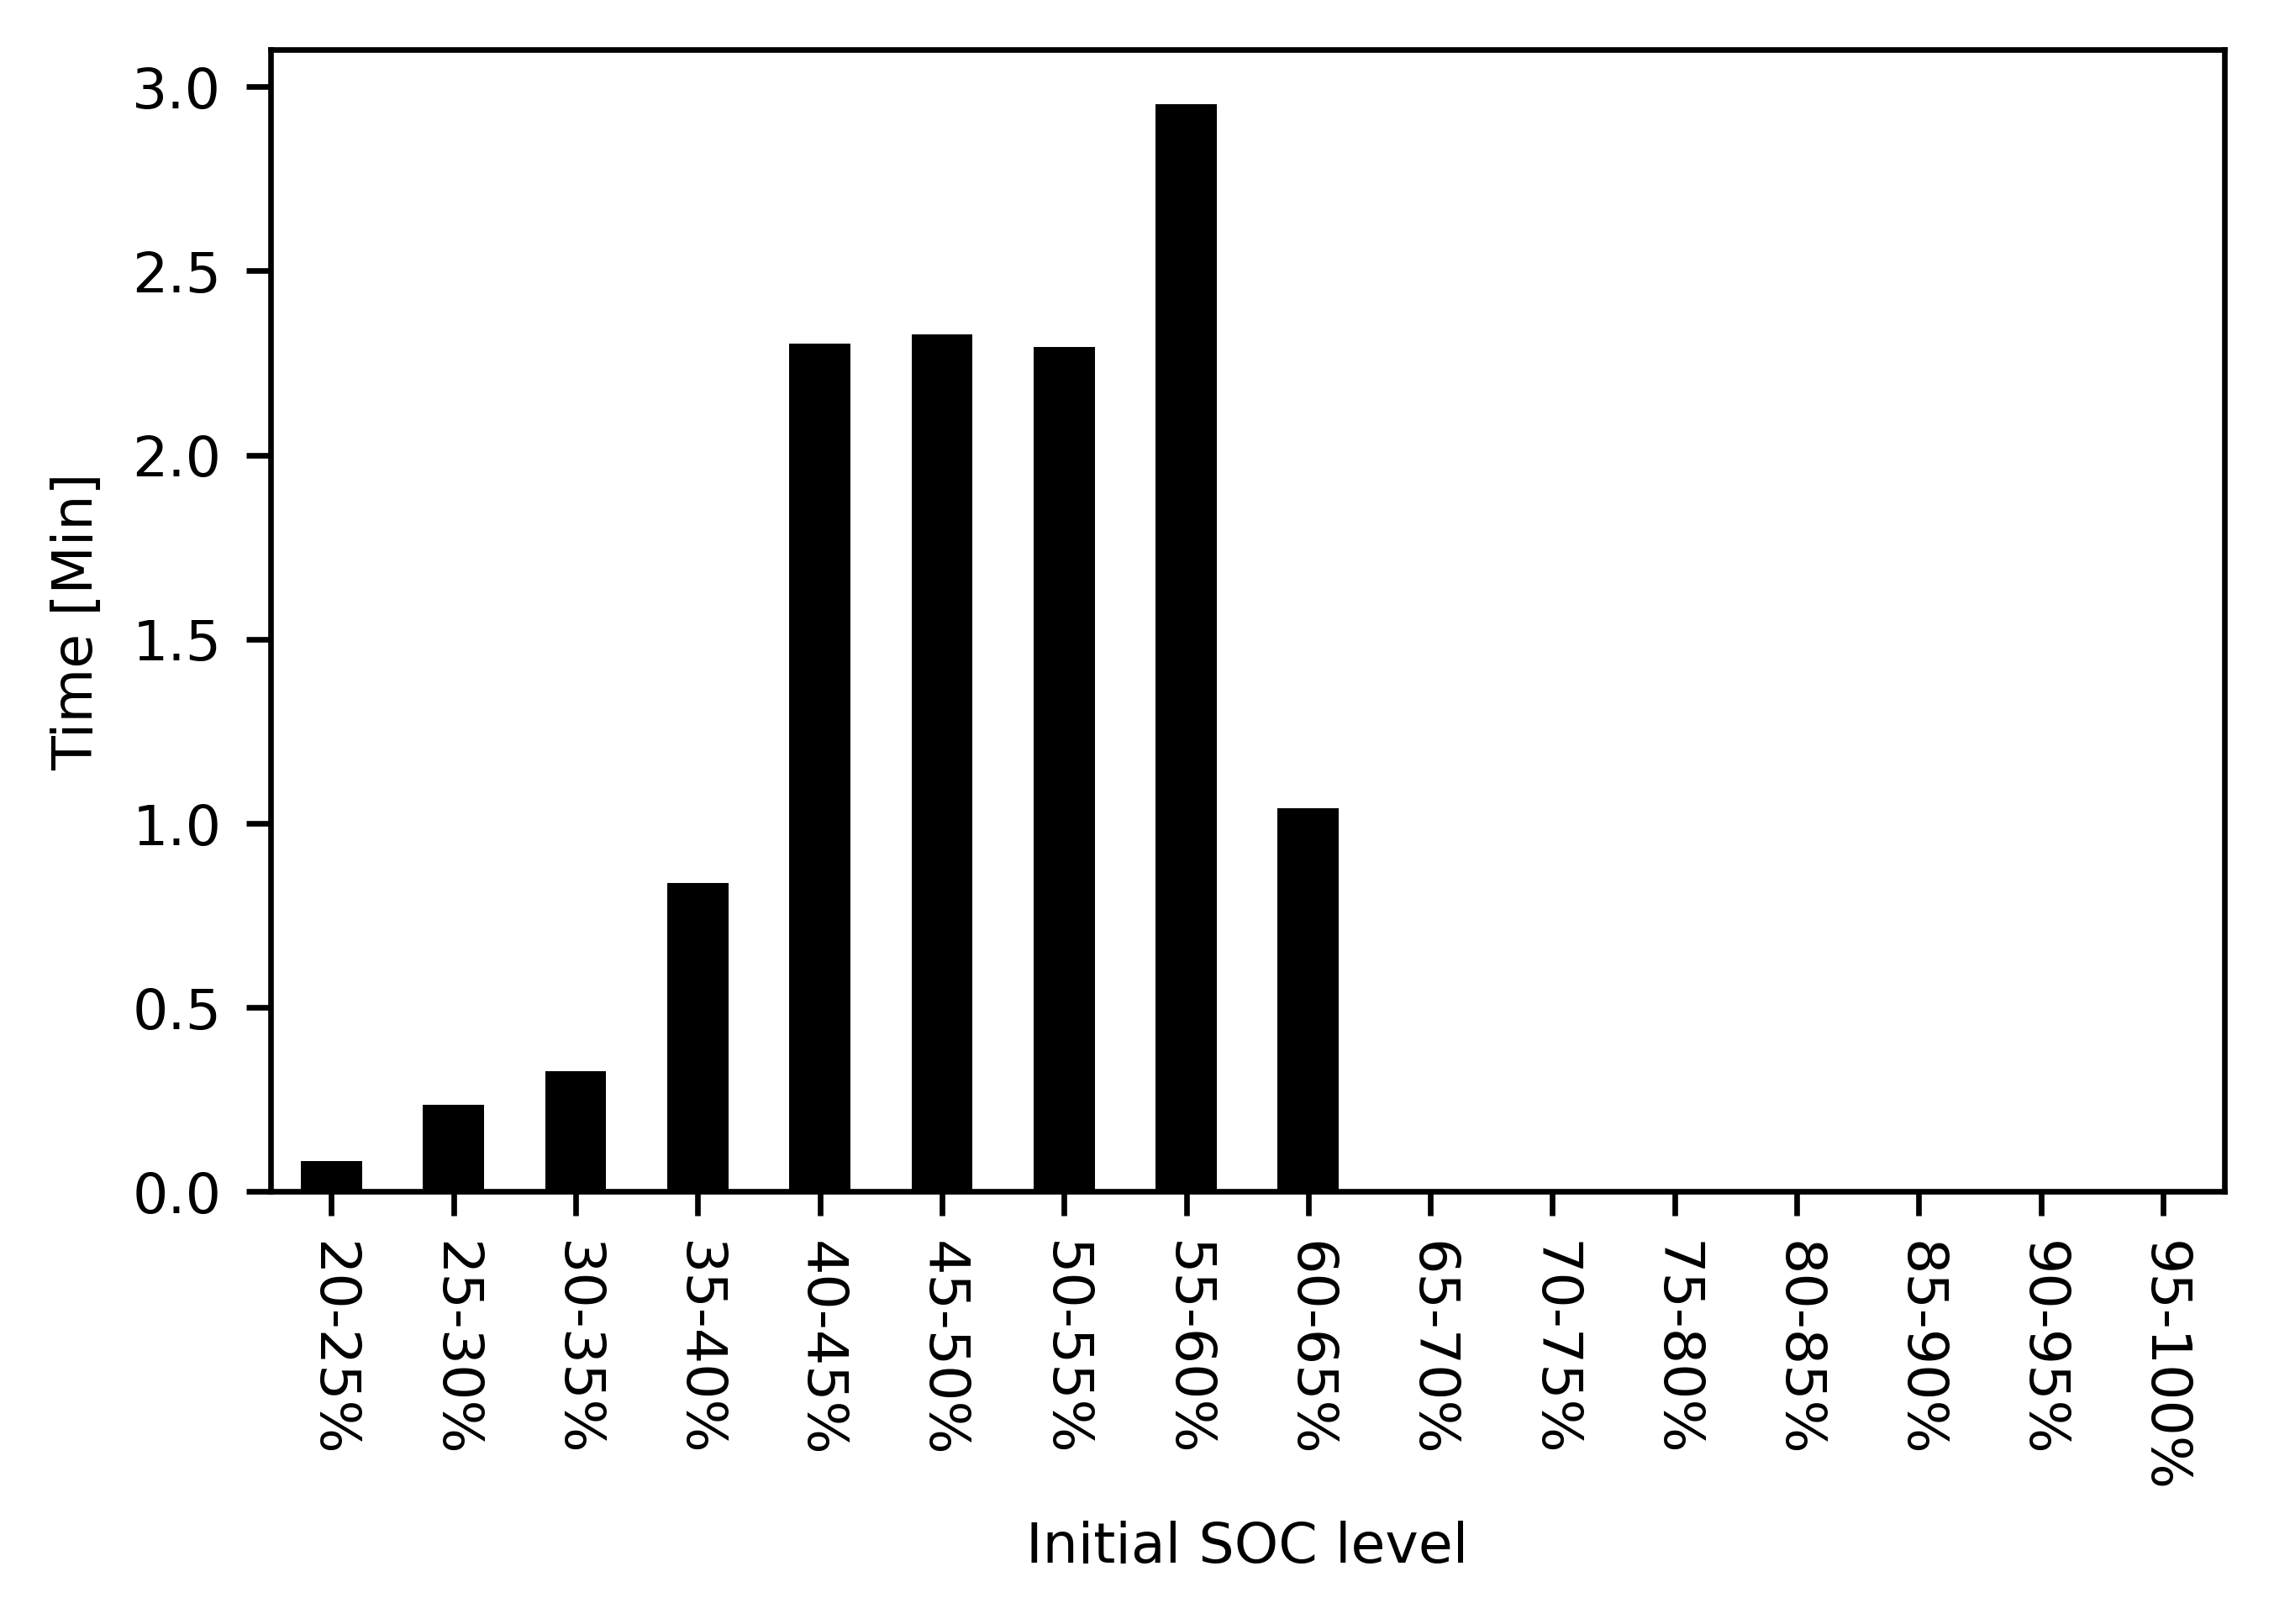

In [23]:
evif = evdf.copy()
evif['sx0'] = sse0.ev['sx']
evif['socf'] = evif['soc']
evif['socs'] = evds['soc']
evif['socgap'] = evif['socs'] - evif['socf']
evif['dt'] = evif['socgap'] * evif['Q'] / evif['Pc'] / evif['nc']
# set negative value to 0
evif['dt'][evif['dt']<0] = 0
# set demanded charged EV to 0
evif['dt'][evif['socf']>=evif['socd']] = 0
# Convert to minutes
evif['dt'] = evif['dt'] * 60

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
evif.groupby(by='sx0').mean()['dt'].plot.bar(fig=fig, ax=ax)
ax.set_xlabel('Initial SOC level')
ax.set_xticklabels([f"{i*5}-{i*5+5}%" for i in evif.groupby('sx0').mean().index.tolist()],
                   rotation = 270)
ax.set_ylabel('Time [Min]')

Text(0.5, 0.98, '')

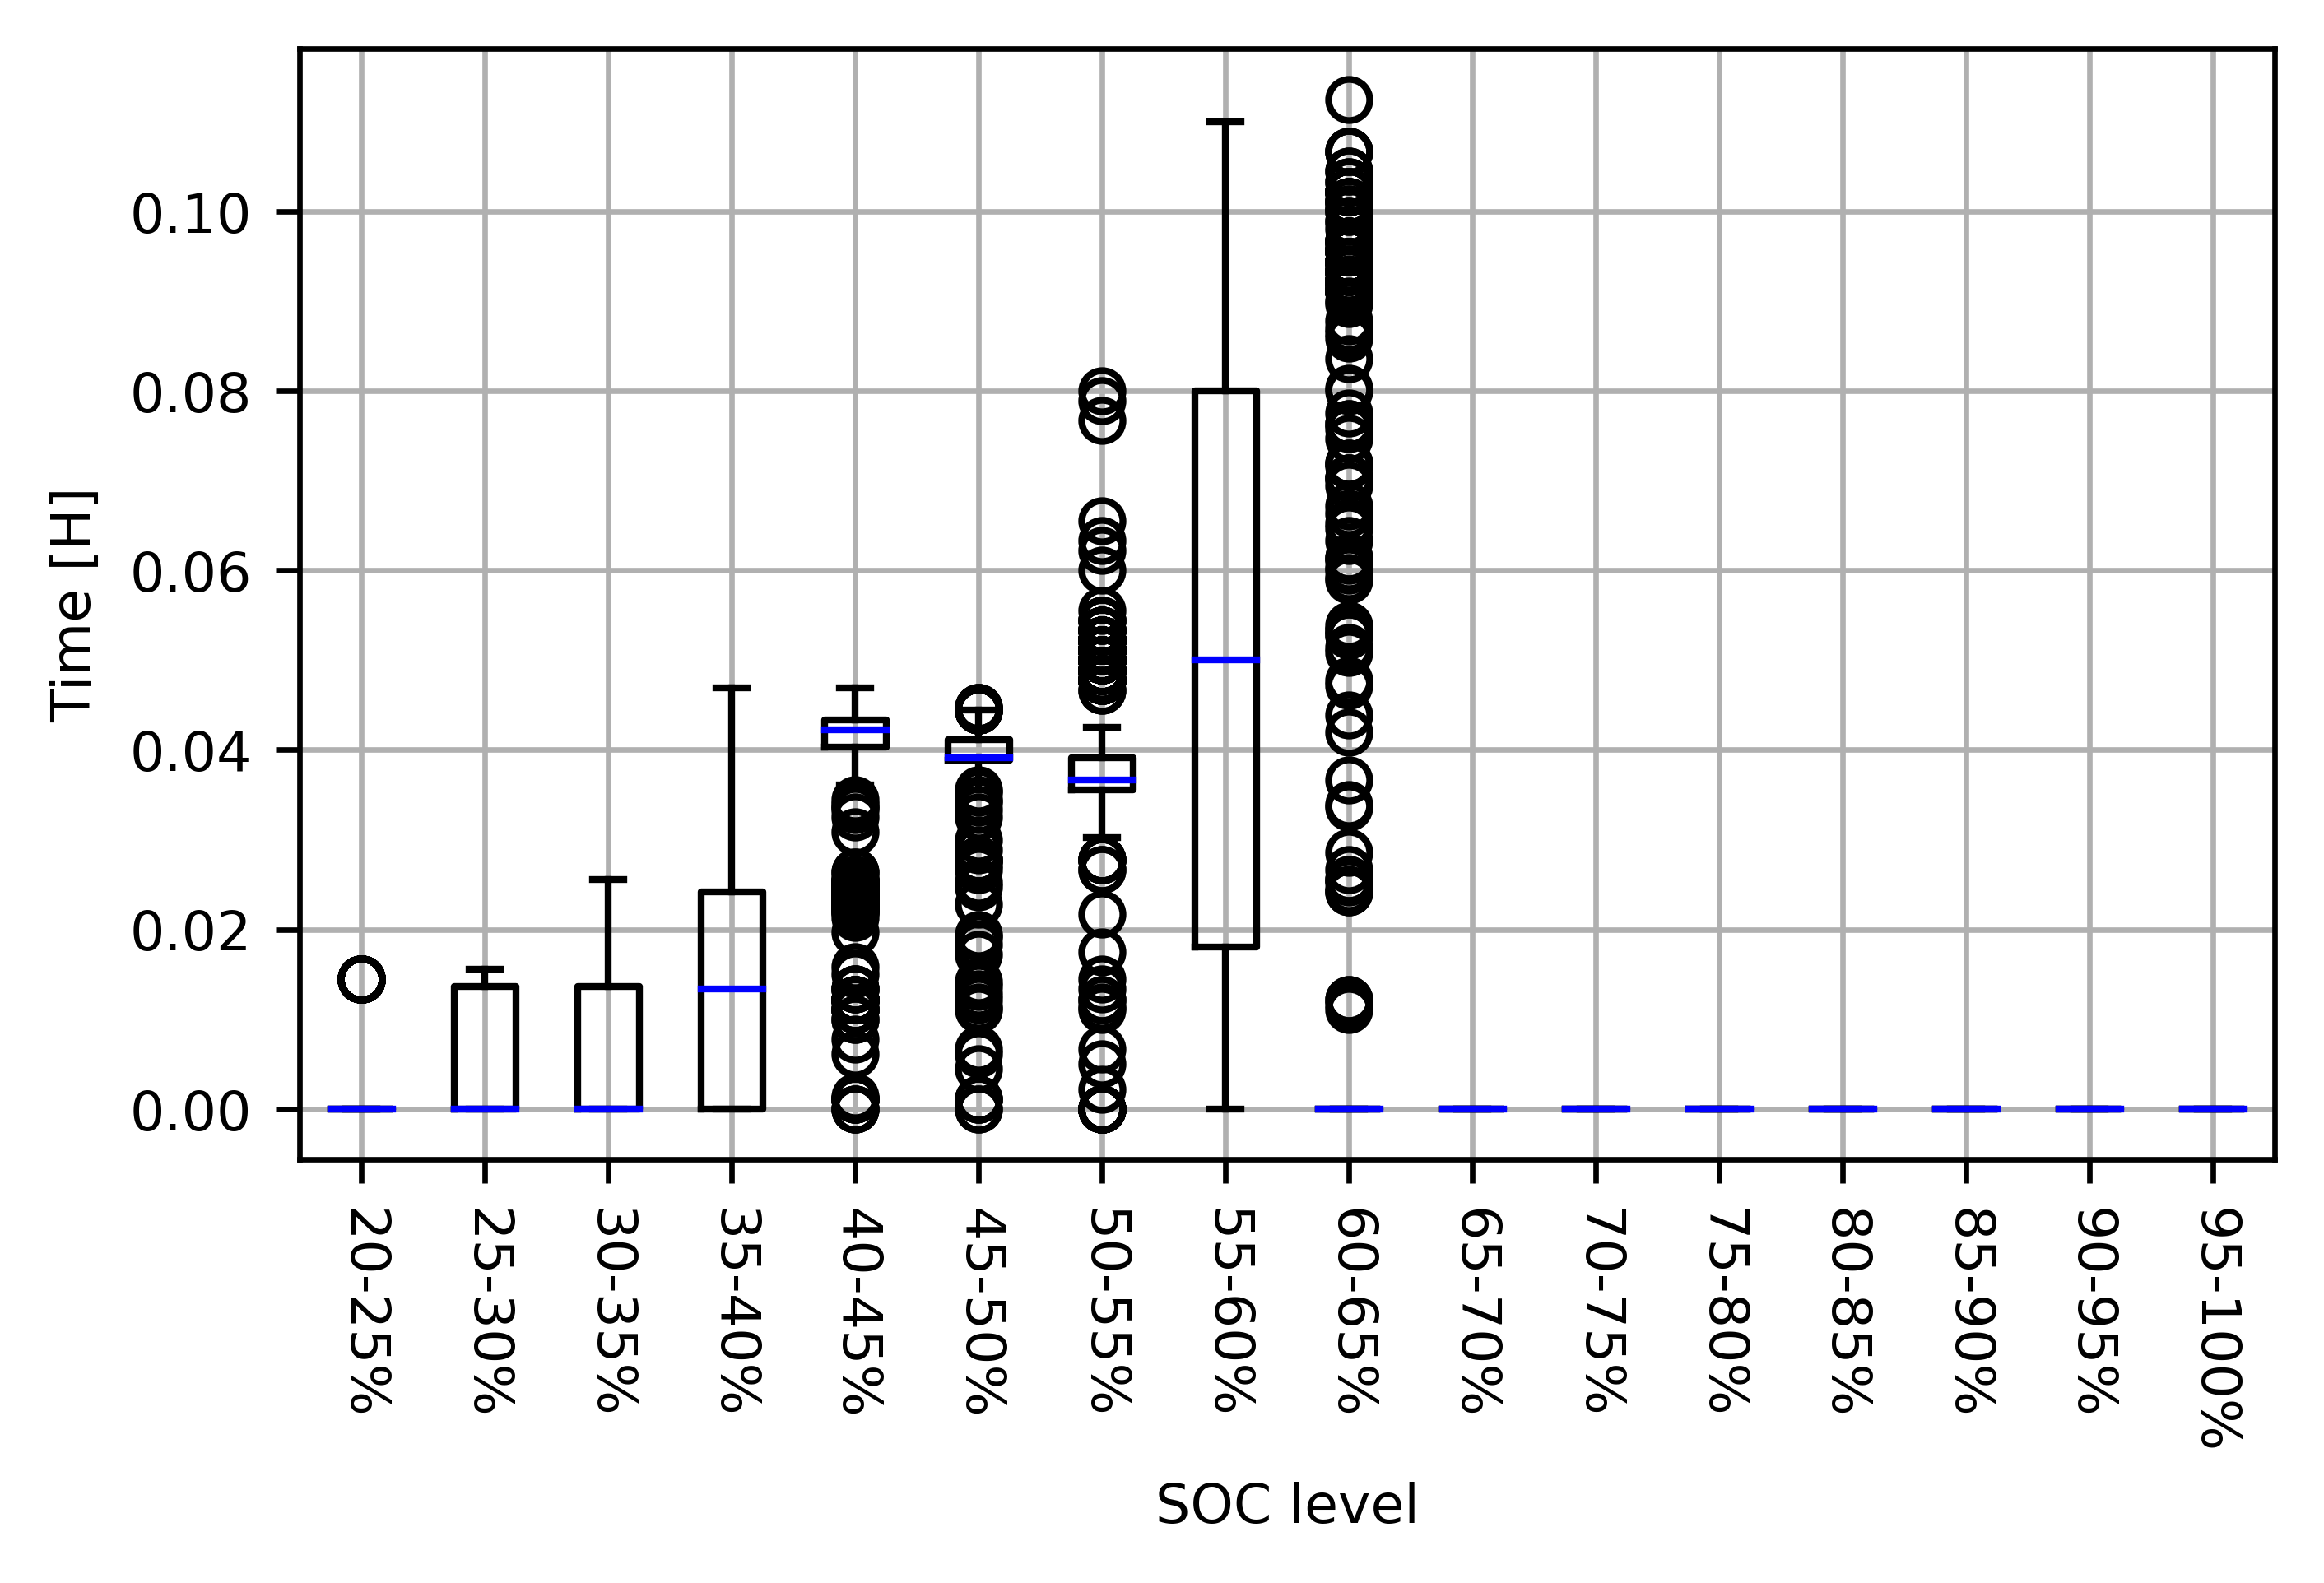

In [24]:
# Delayed time by participating SFR

evif = evdf.copy()
evif['sx0'] = sse0.ev['sx']
evif['socf'] = evif['soc']
evif['socs'] = evds['soc']
evif['socgap'] = evif['socs'] - evif['socf']
evif['dt'] = evif['socgap'] * evif['Q'] / evif['Pc'] / evif['nc']
# set negative value to 0
evif['dt'][evif['dt']<0] = 0
# set demanded charged EV to 0
evif['dt'][evif['socf']>=evif['socd']] = 0

# evih = evdh.copy()
# evih['sx0'] = sse0.ev['sx']
# evih['soc0'] = sse0.ev['soc']
# evih['socf'] = evdh['soc']
# evih['socs'] = evds['soc']
# evih['socgap'] = evih['soc'] - evih['socs']
# evih['dt'] = evih['socgap'] * evih['Q'] / evih['Pc'] / evih['nc']
# evih['dt'][evih['dt']<0] = 0

plt.style.use('ieee')
ax = evif.boxplot(column=['dt'], by='sx0', figsize=(5, 3))
ax.set_title('')
ax.set_xlabel('SOC level')
ax.set_xticklabels([f"{i*5}-{i*5+5}%" for i in evif.groupby('sx0').mean().index.tolist()],
                   rotation = 270)
ax.set_ylabel('Time [H]')
fig = ax.get_figure()
fig.suptitle('')

# ax2 = evih.boxplot(column=['dt'], by='sx0', figsize=(5, 3))
# ax2.set_title('')
# ax2.set_xlabel('SOC level')
# ax2.set_xticklabels([i+1 for i in evif.groupby('sx0').mean().index.tolist()])
# ax2.set_ylabel('Time [H]')
# fig2 = ax2.get_figure()
# fig2.suptitle('')

In [25]:
epsilon = 18
k = 10 * ssa.ACEc.bias.v / epsilon / epsilon # mHz
length = 60

outscp = outs.copy()
outscp['Time'] = outscp['Time'] / length
outscp['Time'] = outscp['Time'].astype(int)
outscp = outscp.groupby('Time').mean()
outscp['prod'] = 100* (2 - k * outscp['ACE'] * outscp['fd'])

outfncp = outfn.copy()
outfncp['Time'] = outfncp['Time'] / length
outfncp['Time'] = outfncp['Time'].astype(int)
outfncp = outfncp.groupby('Time').mean()
outfncp['prod'] = 100* (2 - k * outfncp['ACE'] * outfncp['fd'])

outfcp = outf.copy()
outfcp['Time'] = outfcp['Time'] / length
outfcp['Time'] = outfcp['Time'].astype(int)
outfcp = outfcp.groupby('Time').mean()
outfcp['prod'] = 100* (2 - k * outfcp['ACE'] * outfcp['fd'])

print(f"Case1={outscp['prod'].mean()}, Case2={outfncp['prod'].mean()}, Case3={outfcp['prod'].mean()}")

# fig, ax = plt.subplots(figsize=(3.5, 3))
# outscp.plot(y='prod', kind='kde', color='tab:blue', linestyle='-',
#             legend=False, linewidth=1, fig=fig, ax=ax, label='Case1')
# outhcp.plot(y='prod', kind='kde', color='tab:green', linestyle='-',
#             legend=False, linewidth=1, fig=fig, ax=ax, label='Case2')
# outfcp.plot(y='prod', kind='kde', color='tab:orange', linestyle='--',
#             legend=False, linewidth=1, fig=fig, ax=ax, label='Case3')
# ax.legend()
# ax.set_xlabel('CPS1')
# outscp.plot(y='prod', kind='hist', density=True, bins=30, color='tab:blue',
#             legend=False, fig=fig, ax=ax, label='Case1')
# outfcp.plot(y='prod', kind='hist', density=True, bins=30, color='tab:orange',
#             legend=False, fig=fig, ax=ax, label='Case2')

Case1=403.22554475849637, Case2=416.82603272486557, Case3=409.489700051463


In [26]:
# --- generation cost ---
gtf = 0
gts = 0
gtfn = 0
for i in pgf.index:
    cf = ssd.cost.c2.values * np.power(pgf.loc[i].values, 2) \
        + ssd.cost.c1.values * pgf.loc[i].values \
        + ssd.cost.c1.values
    cs = ssd.cost.c2.values * np.power(pgs.loc[i].values, 2) \
        + ssd.cost.c1.values * pgs.loc[i].values \
        + ssd.cost.c1.values
    cfn = ssd.cost.c2.values * np.power(pgfn.loc[i].values, 2) \
        + ssd.cost.c1.values * pgfn.loc[i].values \
        + ssd.cost.c1.values
    gtf += np.sum(cf)
    gts += np.sum(cs)
    gtfn += np.sum(cfn)

# --- SFR mileage cost ---
ftf = 0
fts = 0
ftfn = 0
for i in agcf.columns:
    cf = ssd.cost.c1.abs().values * agcf[i].values
    cs = ssd.cost.c1.abs().values * agcs[i].values
    cfn = ssd.cost.c1.abs().values * agcfn[i].values
    ftf += np.sum(cf)
    fts += np.sum(cs)
    ftfn += np.sum(cfn)

print(f"Total Mile: Case1={np.round(agcs.sum().sum(), 2)}, Case2={np.round(agcfn.sum().sum(), 2)}, Case3={np.round(agcf.sum().sum(), 2)}")
print(f"EV AGC Mile: Case1={agcs.loc[9].sum()}, Case2={agcfn.loc[9].sum()}, Case3={agcf.loc[9].sum()}")
print(f"Total cost: Case1={np.round(gts+fts, 2)}, Case2={np.round(gtfn+ftfn, 2)}, Case3={np.round(gtf+ftf, 2)}")

Total Mile: Case1=14094.11, Case2=15474.39, Case3=15025.22
EV AGC Mile: Case1=0.0, Case2=3260.170648283201, Case3=2680.999780088366
Total cost: Case1=295985.53, Case2=290930.74, Case3=287778.14


Freq. D.: case1=0.011430435499766576, case2=0.011568152851979083, case3=0.011420574752472273
ACE D.: case1=39.979724865326666, case2=40.461231793047396, case3=39.94386484119759


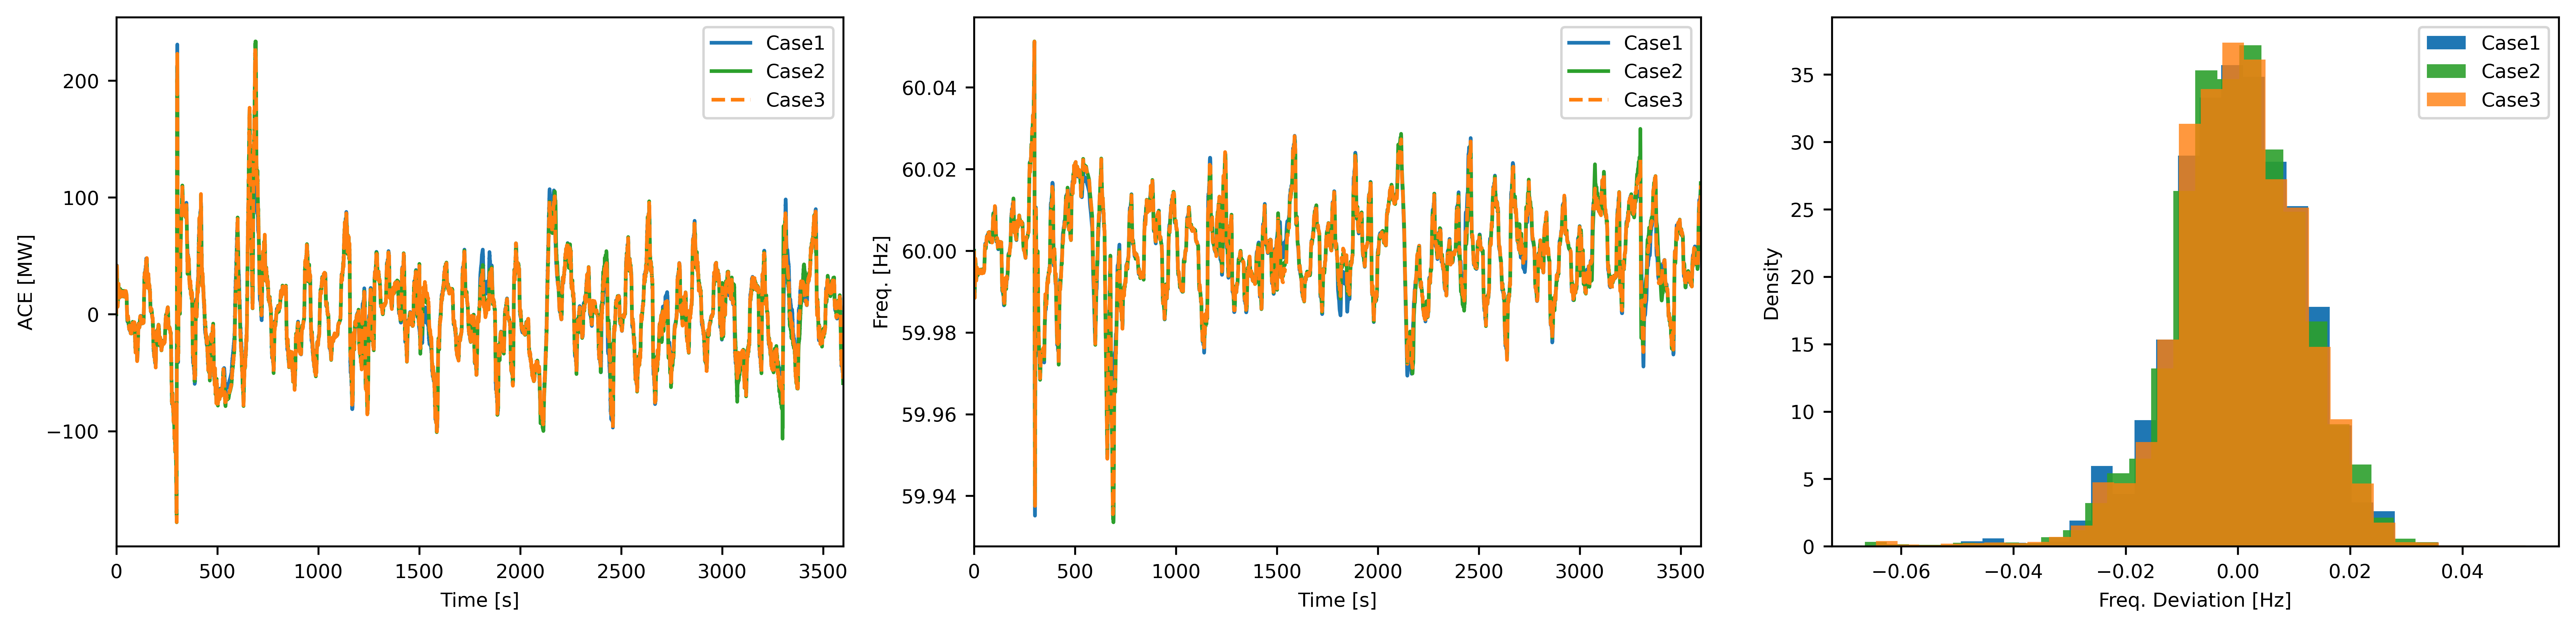

In [27]:
plt.style.use('ieee')
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.18, hspace=None)
# ACE
outs.plot(x='Time', y='ACE', ax=ax[0], fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x='Time', y='ACE', ax=ax[0], fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x='Time', y='ACE', ax=ax[0], fig=fig, label='Case3', linestyle='--', color='tab:orange')
# COI freq.
outs.plot(x='Time', y='freq', ax=ax[1], fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x='Time', y='freq', ax=ax[1], fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x='Time', y='freq', ax=ax[1], fig=fig, label='Case3', linestyle='--', color='tab:orange')
# COI std.
outs.plot(x='Time', y='fd', kind='hist', density=True, bins=30, color='tab:blue', alpha=1,
          legend=False, linewidth=1, fig=fig, ax=ax[2], label='Case1')
outfn.plot(x='Time', y='fd', kind='hist', density=True, bins=30, color='tab:green', alpha=0.9,
          legend=False, linewidth=1, fig=fig, ax=ax[2], label='Case2')
outf.plot(x='Time', y='fd', kind='hist', density=True, bins=30, color='tab:orange', alpha=0.8,
          legend=False, linewidth=1, fig=fig, ax=ax[2], label='Case3')
# outs.plot(x='Time', y='fd', kind='kde', color='tab:blue',
#           legend=False, fig=fig, ax=ax[2], label='Case1')
# outfn.plot(x='Time', y='fd', kind='kde', color='tab:green',
#           legend=False, fig=fig, ax=ax[2], label='Case2')
# outf.plot(x='Time', y='fd', kind='kde', color='tab:orange',
#           legend=False, fig=fig, ax=ax[2], label='Case3')

ax[0].set_xlim([0, 3600])
ax[1].set_xlim([0, 3600])
ax[0].set_xlabel('Time [s]')
ax[1].set_xlabel('Time [s]')
ax[0].set_ylabel('ACE [MW]')
ax[1].set_ylabel('Freq. [Hz]')
ax[2].set_xlabel('Freq. Deviation [Hz]')
ax[2].set_ylabel('Density')
ax[2].legend()

print(f"Freq. D.: case1={outs['fd'].std()}, case2={outfn['fd'].std()}, case3={outf['fd'].std()}")
print(f"ACE D.: case1={outs['ACE'].std()}, case2={outfn['ACE'].std()}, case3={outf['ACE'].std()}")

No SFR, if soc >= socd
SFR, soc < socd
incldue all EVs, 
delayed_time = (socd - soc) * Q / Pc / nc
  
total_charging_time (soc_init + soc_gap -> scod)


In [28]:
# evif[['soc0', 'socf', 'socd', 'socgap', 'Q', 'Pc', 'dt', 'nc']]

In [29]:
import matplotlib.font_manager

Text(0, 0.5, 'G3 AGC response [MW]')

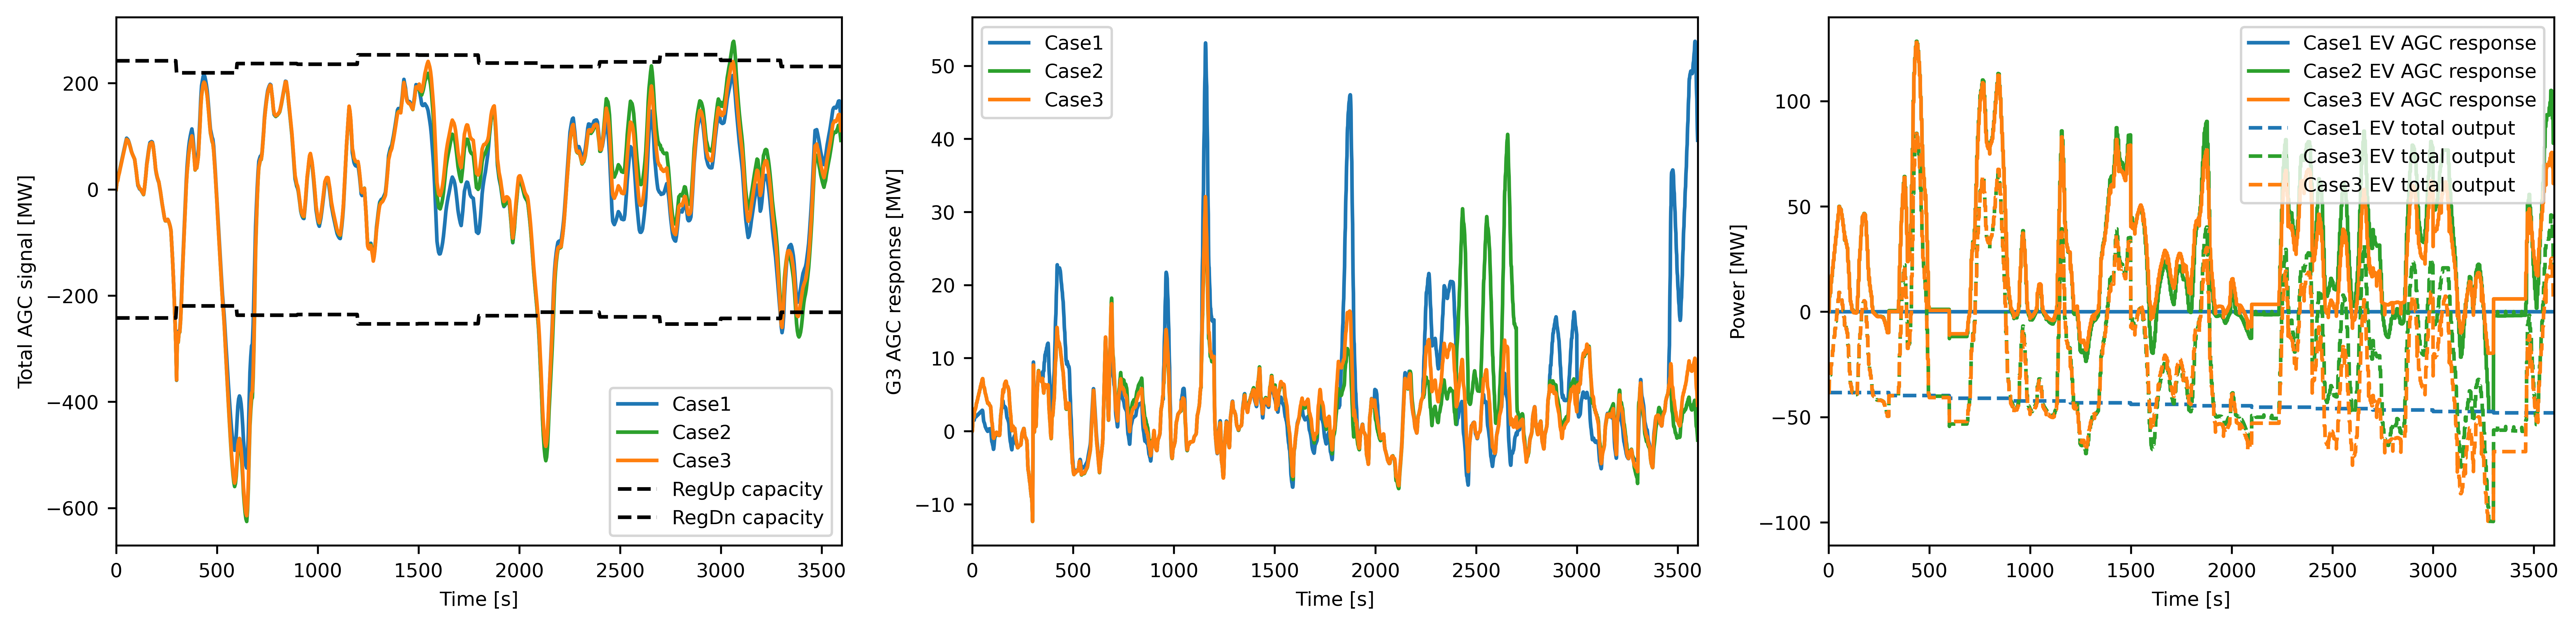

In [30]:
plt.style.use('ieee')
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.18, hspace=None)

evs.plot(y=['Prc'], label=['Case1 EV AGC response'], linestyle='-', color='tab:blue', ax=ax[2], fig=fig)
evfn.plot(y=['Prc'], label=['Case2 EV AGC response'], linestyle='-', color='tab:green', ax=ax[2], fig=fig)
evf.plot(y=['Prc'], label=['Case3 EV AGC response'], linestyle='-', color='tab:orange', ax=ax[2], fig=fig)
evs.plot(y=['Pt'], label=['Case1 EV total output'], linestyle='--', color='tab:blue', ax=ax[2], fig=fig)
evfn.plot(y=['Pt'], label=['Case3 EV total output'], linestyle='--', color='tab:green', ax=ax[2], fig=fig)
evf.plot(y=['Pt'], label=['Case3 EV total output'], linestyle='--', color='tab:orange', ax=ax[2], fig=fig)
ax[2].legend()
ax[2].set_xlim([0, 3600])
ax[2].set_xlabel('Time [s]')
ax[2].set_ylabel('Power [MW]')

sfrs.plot(x='time', y='ace', ax=ax[0], fig=fig, label='Case1', linestyle='-', color='tab:blue')
sfrfn.plot(x='time', y='ace', ax=ax[0], fig=fig, label='Case2', linestyle='-', color='tab:green')
sfrf.plot(x='time', y='ace', ax=ax[0], fig=fig, label='Case3', linestyle='-', color='tab:orange')
sfrs.plot(x='time', y='up', ax=ax[0], fig=fig, label='RegUp capacity', linestyle='--', color='black')
sfrs.plot(x='time', y='dn', ax=ax[0], fig=fig, label='RegDn capacity', linestyle='--', color='black')
ax[0].set_xlim([0, 3600])
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Total AGC signal [MW]')

outs.plot(x='Time', y='paux9', ax=ax[1], fig=fig, label='Case1', linestyle='-', color='tab:blue')
outfn.plot(x='Time', y='paux9', ax=ax[1], fig=fig, label='Case2', linestyle='-', color='tab:green')
outf.plot(x='Time', y='paux9', ax=ax[1], fig=fig, label='Case3', linestyle='-', color='tab:orange')
ax[1].set_xlim([0, 3600])
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('G3 AGC response [MW]')

/tmp/ipykernel_904340/1216912222.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])


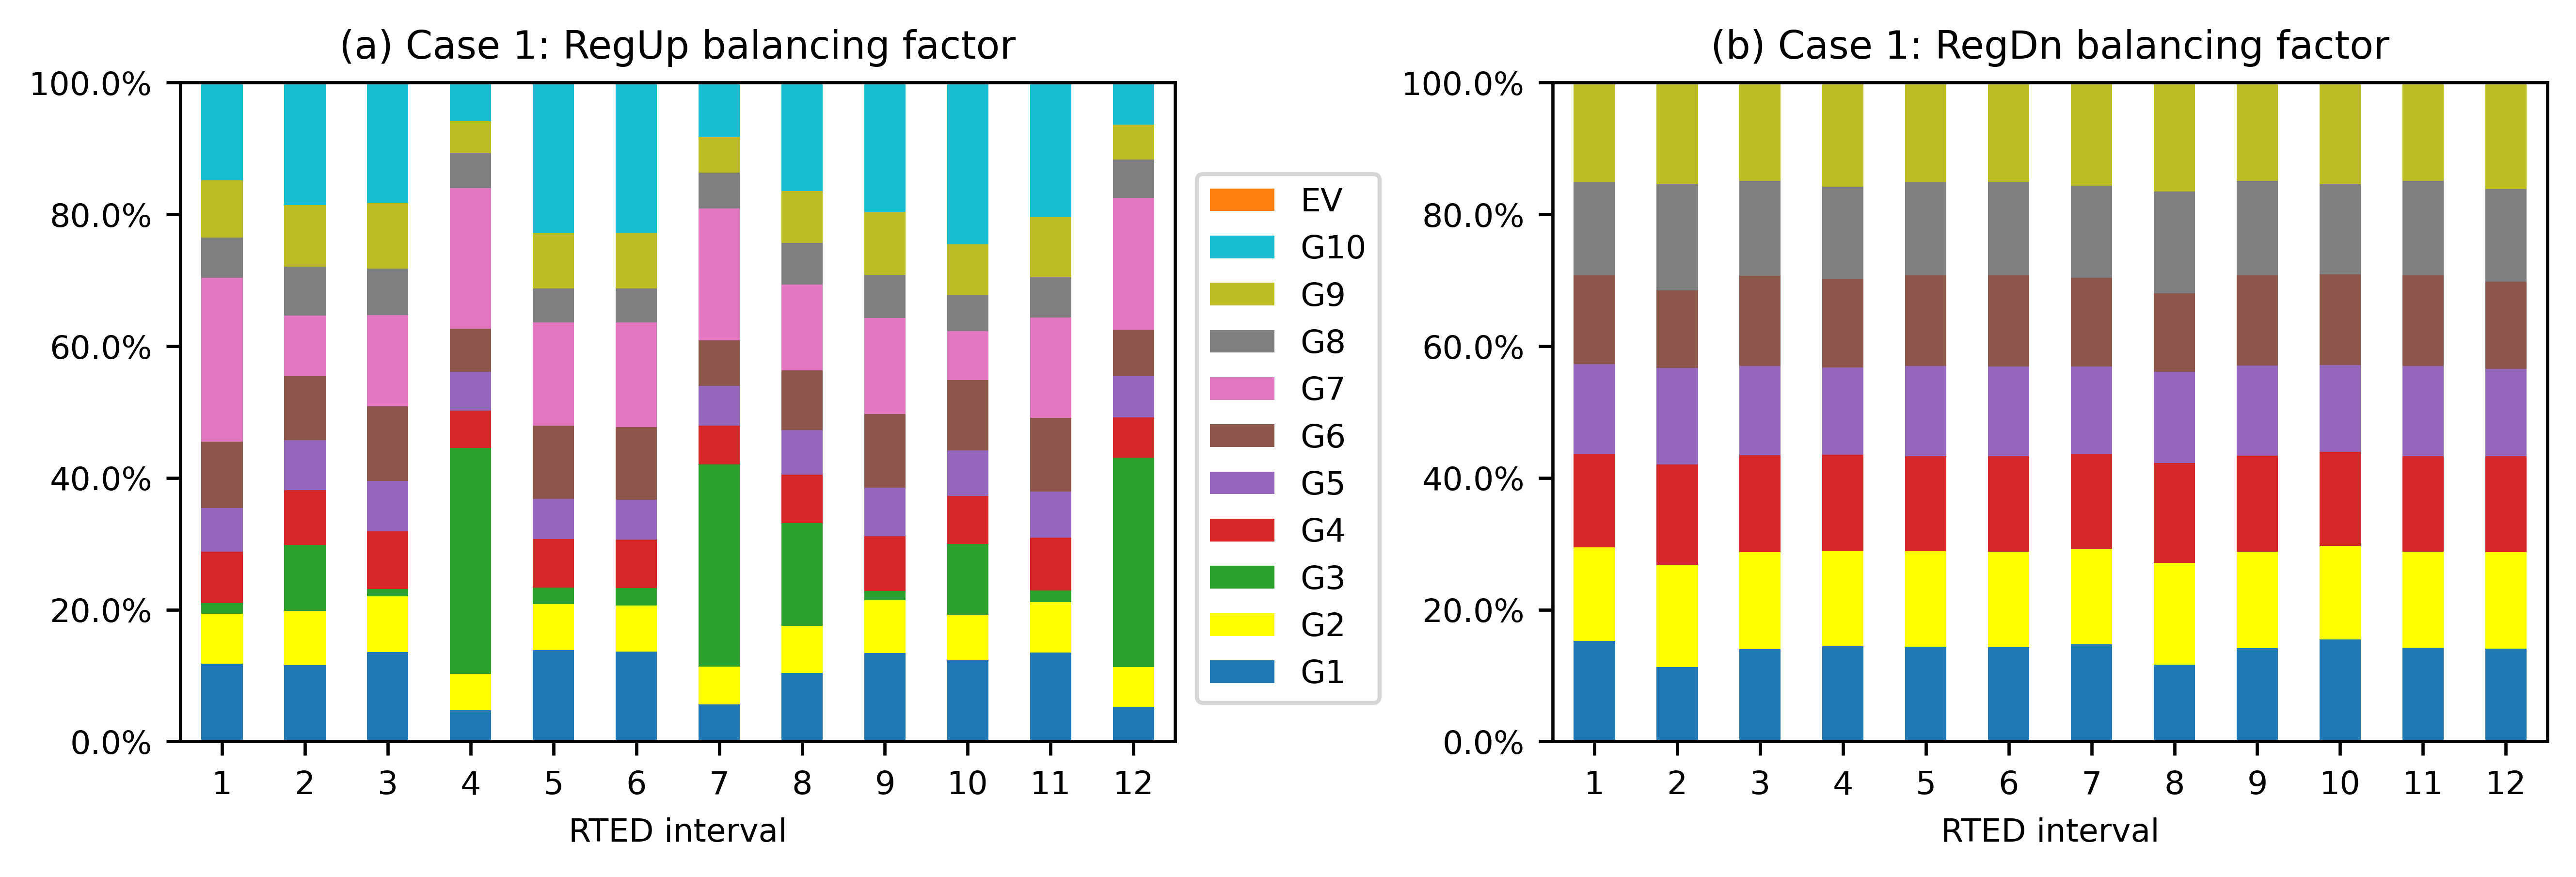

In [31]:
plt.style.use('ieee')

bu_df = pd.read_csv('cosim_18_S_bu.csv')
bd_df = pd.read_csv('cosim_18_S_bd.csv')

color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']

figs, axes = plt.subplots(1, 2, figsize=(10.5, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.38, hspace=None)
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
bu_df[new_cols].plot.bar(stacked=True, ax=axes[0], legend=False, color=color)
bd_df[new_cols].plot.bar(stacked=True, ax=axes[1], legend=False, color=color)

for ax in axes:
    ax.tick_params(axis='x', labelrotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
    ax.set_xticklabels([i for i in range(1,13,1)])
    ax.set_xlabel('RTED interval')
axes[0].set_title('(a) Case 1: RegUp balancing factor')
axes[1].set_title('(b) Case 1: RegDn balancing factor')
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']
label_g.reverse()
figs.legend(line_plot, label_g, loc='center')

/tmp/ipykernel_904340/4068592367.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])


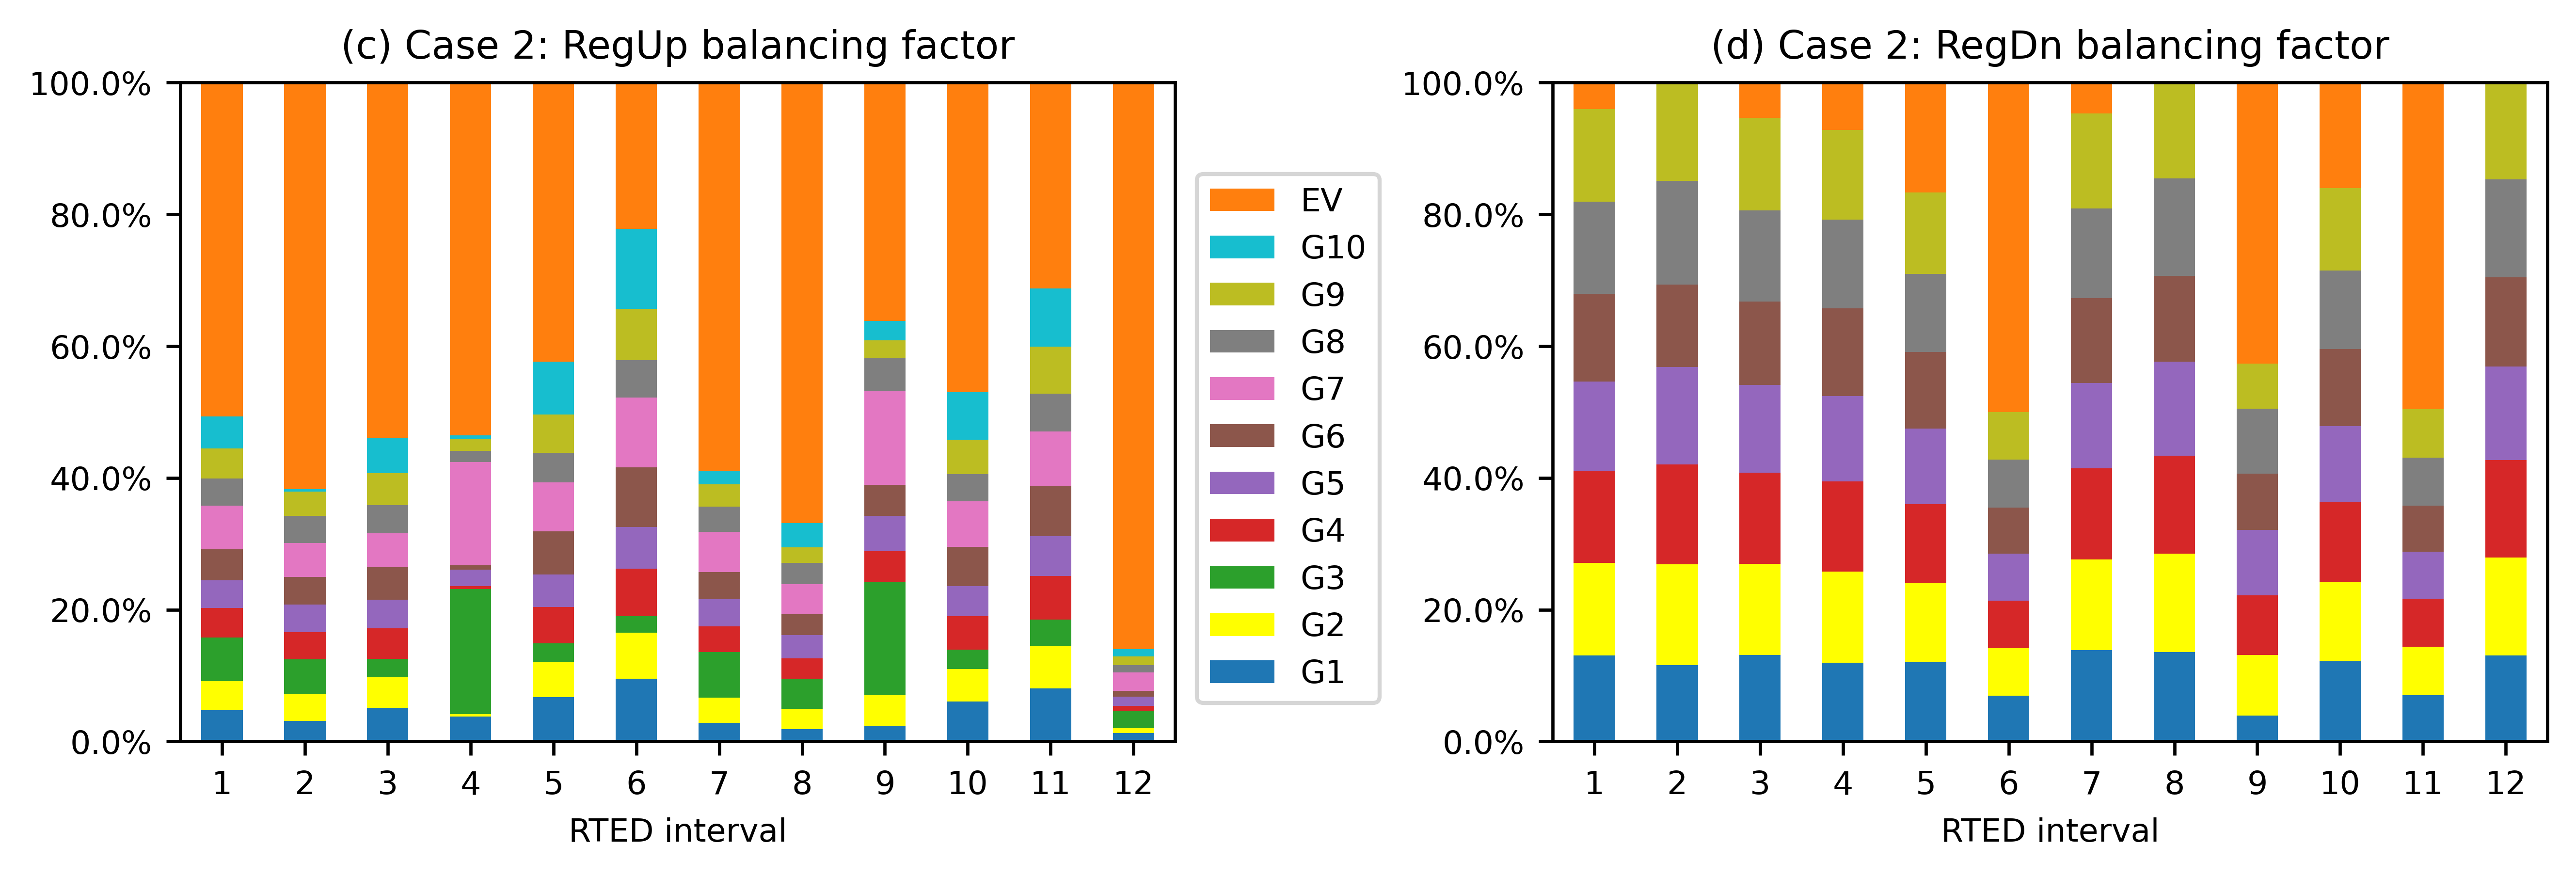

In [32]:
plt.style.use('ieee')

bu_df = pd.read_csv('cosim_18_F_bu.csv')
bd_df = pd.read_csv('cosim_18_F_bd.csv')

color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']

figs, axes = plt.subplots(1, 2, figsize=(10.5, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.38, hspace=None)
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
bu_df[new_cols].plot.bar(stacked=True, ax=axes[0], legend=False, color=color)
bd_df[new_cols].plot.bar(stacked=True, ax=axes[1], legend=False, color=color)

for ax in axes:
    ax.tick_params(axis='x', labelrotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
    ax.set_xticklabels([i for i in range(1,13,1)])
    ax.set_xlabel('RTED interval')
axes[0].set_title('(c) Case 2: RegUp balancing factor')
axes[1].set_title('(d) Case 2: RegDn balancing factor')
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']
label_g.reverse()
figs.legend(line_plot, label_g, loc='center')

/tmp/ipykernel_904340/2794434502.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])


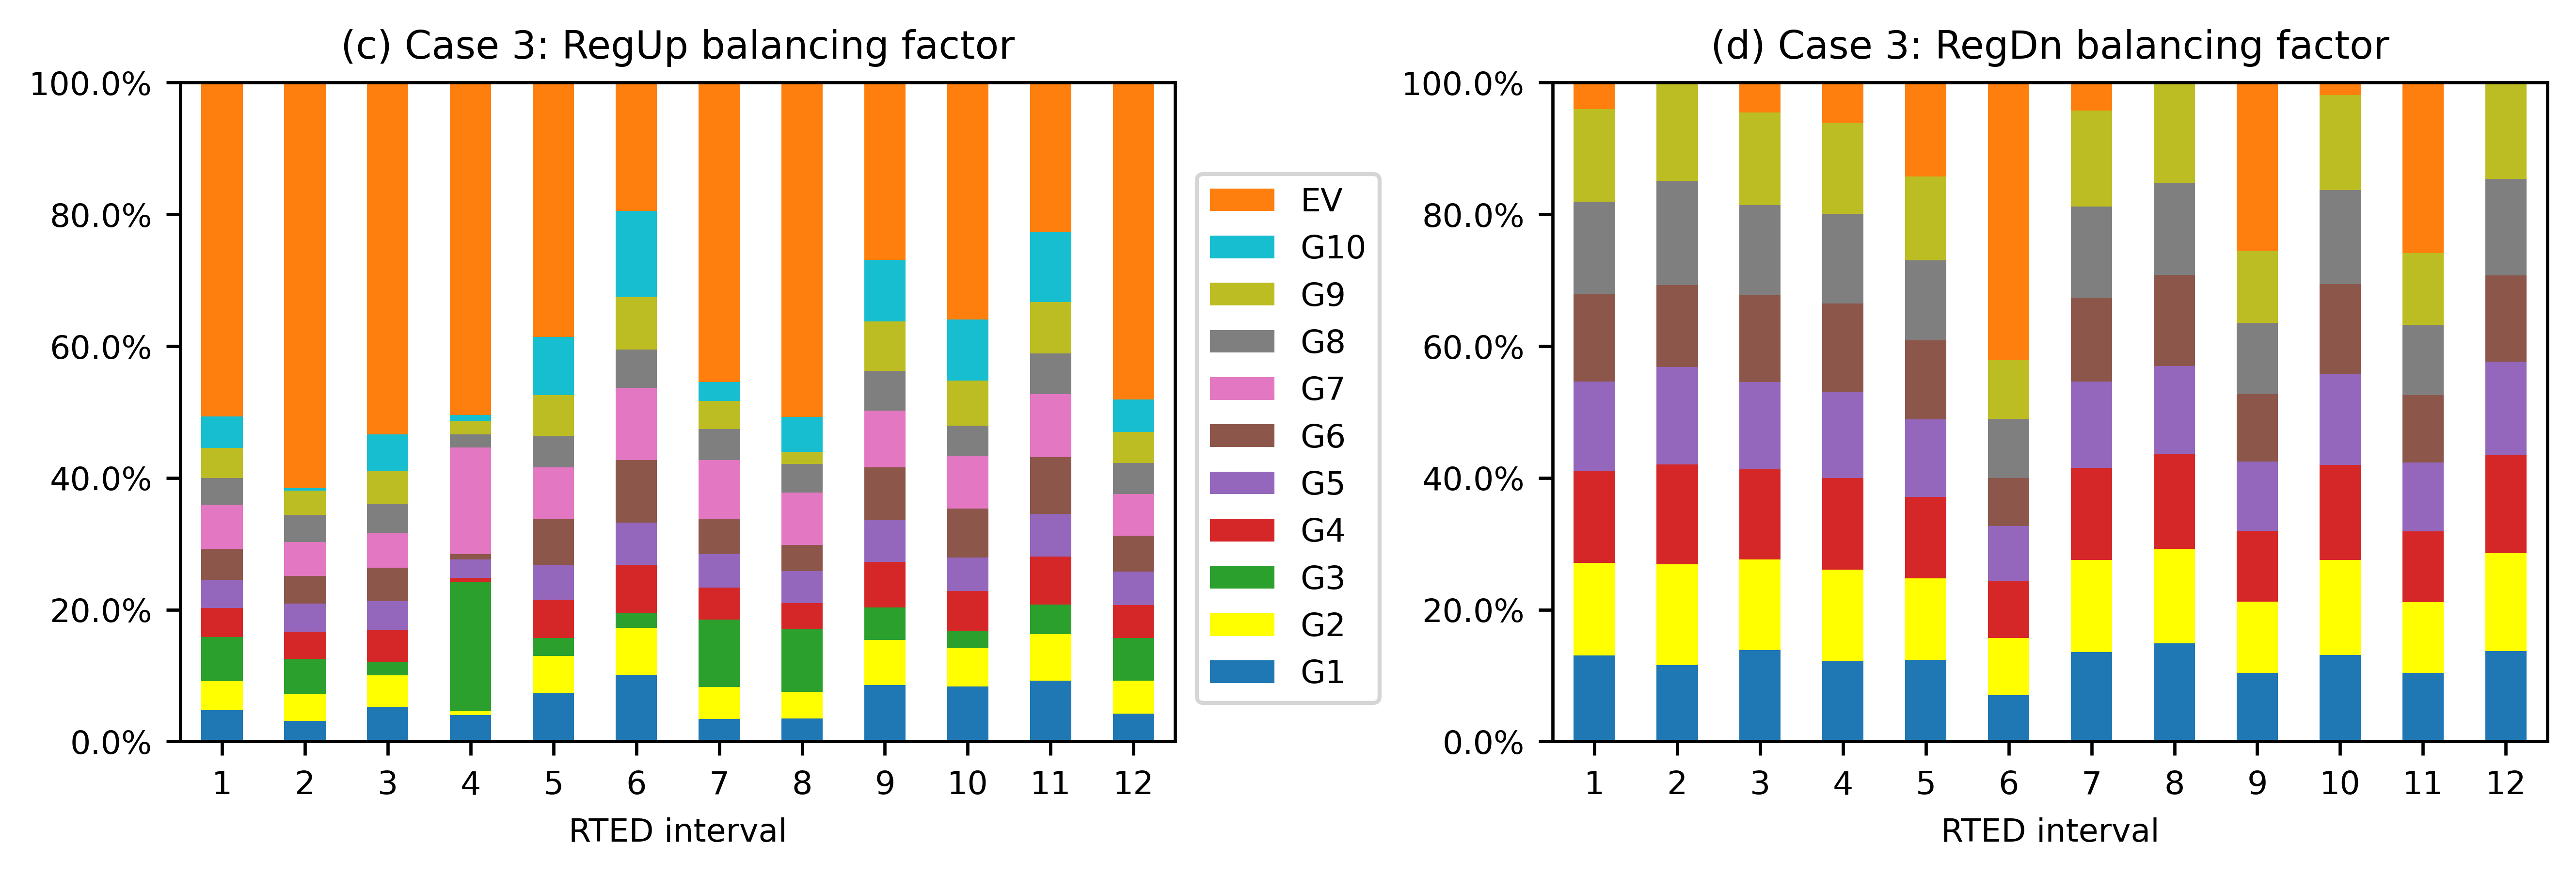

In [33]:
plt.style.use('ieee')

bu_df = pd.read_csv('cosim_18_F_ict_bu.csv')
bd_df = pd.read_csv('cosim_18_F_ict_bd.csv')

color = ['tab:blue', 'yellow', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown',
         'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:orange']

figs, axes = plt.subplots(1, 2, figsize=(10.5, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.38, hspace=None)
new_cols = ['PV_1', 'PV_2', 'PV_3', 'PV_4', 'PV_5', 'PV_6',
            'PV_7', 'PV_8', 'PV_9', 'Slack_10', 'PV_10']
bu_df[new_cols].plot.bar(stacked=True, ax=axes[0], legend=False, color=color)
bd_df[new_cols].plot.bar(stacked=True, ax=axes[1], legend=False, color=color)

for ax in axes:
    ax.tick_params(axis='x', labelrotation = 0)
    ax.set_ylim([0, 1])
    ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])
    ax.set_xticklabels([i for i in range(1,13,1)])
    ax.set_xlabel('RTED interval')
axes[0].set_title('(c) Case 3: RegUp balancing factor')
axes[1].set_title('(d) Case 3: RegDn balancing factor')
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
line_plot = lines[0:11]
line_plot.reverse()
label_g = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'EV']
label_g.reverse()
figs.legend(line_plot, label_g, loc='center')